In [1]:
import pandas as pd
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch
from fast_jtnn import *
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 100)

RDKit WARNING: [15:06:19] Enabling RDKit 2019.09.1 jupyter extensions
[15:06:19] Enabling RDKit 2019.09.1 jupyter extensions
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data

In [2]:
inp = pd.read_csv('./data/qm9_smiles_prop.csv')

In [3]:
inp['INCHI'] = inp['smiles'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
inp = inp.drop_duplicates(subset=['INCHI'], keep='first')
inp

smiles    homo    lumo         r2  \
0                       O=C1Cc2[nH]ccc2N1 -0.1857  0.0144  1083.5746   
1                       C#CC(=NO)C(C)(C)C -0.2373 -0.0309  1224.4887   
2            C[C@H]1O[C@]12C[C@@H](C=O)C2 -0.2526 -0.0263  1502.4779   
3             CC(C)C[C@H]1O[C@H]2C[C@H]21 -0.2332  0.0843  1502.5925   
4       C[C@H]1C[C@H]2O[C]([NH])C[C@@H]12 -0.2514  0.0310  1090.0422   
...                                   ...     ...     ...        ...   
123096  [CH]1CO[C@@H]2[C]1[C@@H]1C[C@H]21 -0.2278  0.0041   777.9783   
123097                 CCO[C@H]1CO[C@H]1C -0.2440  0.0779  1211.9981   
123098                 CC1(C)CCC[C@H]1C#N -0.3034  0.0350  1188.9317   
123100             C[N]C1=C[C@@H](N)OC=C1 -0.1944 -0.0150  1298.0189   
123101               O=C1C=C2NC[C@@H]2NC1 -0.2170 -0.0214  1109.7846   

                              INCHI  
0       OPYRETPBRCRXQU-UHFFFAOYSA-N  
1       TULQGOZYBSXENW-UHFFFAOYSA-N  
2       CMQJPFPGSIAKMQ-QYNIQEEDSA-N  
3       QNOUHVSINBKQMQ-RNJXMRFFSA-N  
4       NJWMOGUILIDSKF-HCWXCVPCSA-N  
...                             ...  
123096  KYWWHOSSNGYYCA-LYFYHCNISA-N  
123097  LKPWWMDDBNEFHA-WDSKDSINSA-N  
123098  YFQUNIXBJWWKJZ-ZETCQYMHSA-N  
123100  QRZNKGKROXWJLW-LURJTMIESA-N  
123101  BSMMGEUCHRGBPH-LURJTMIESA-N  

[119399 rows x 5 columns]

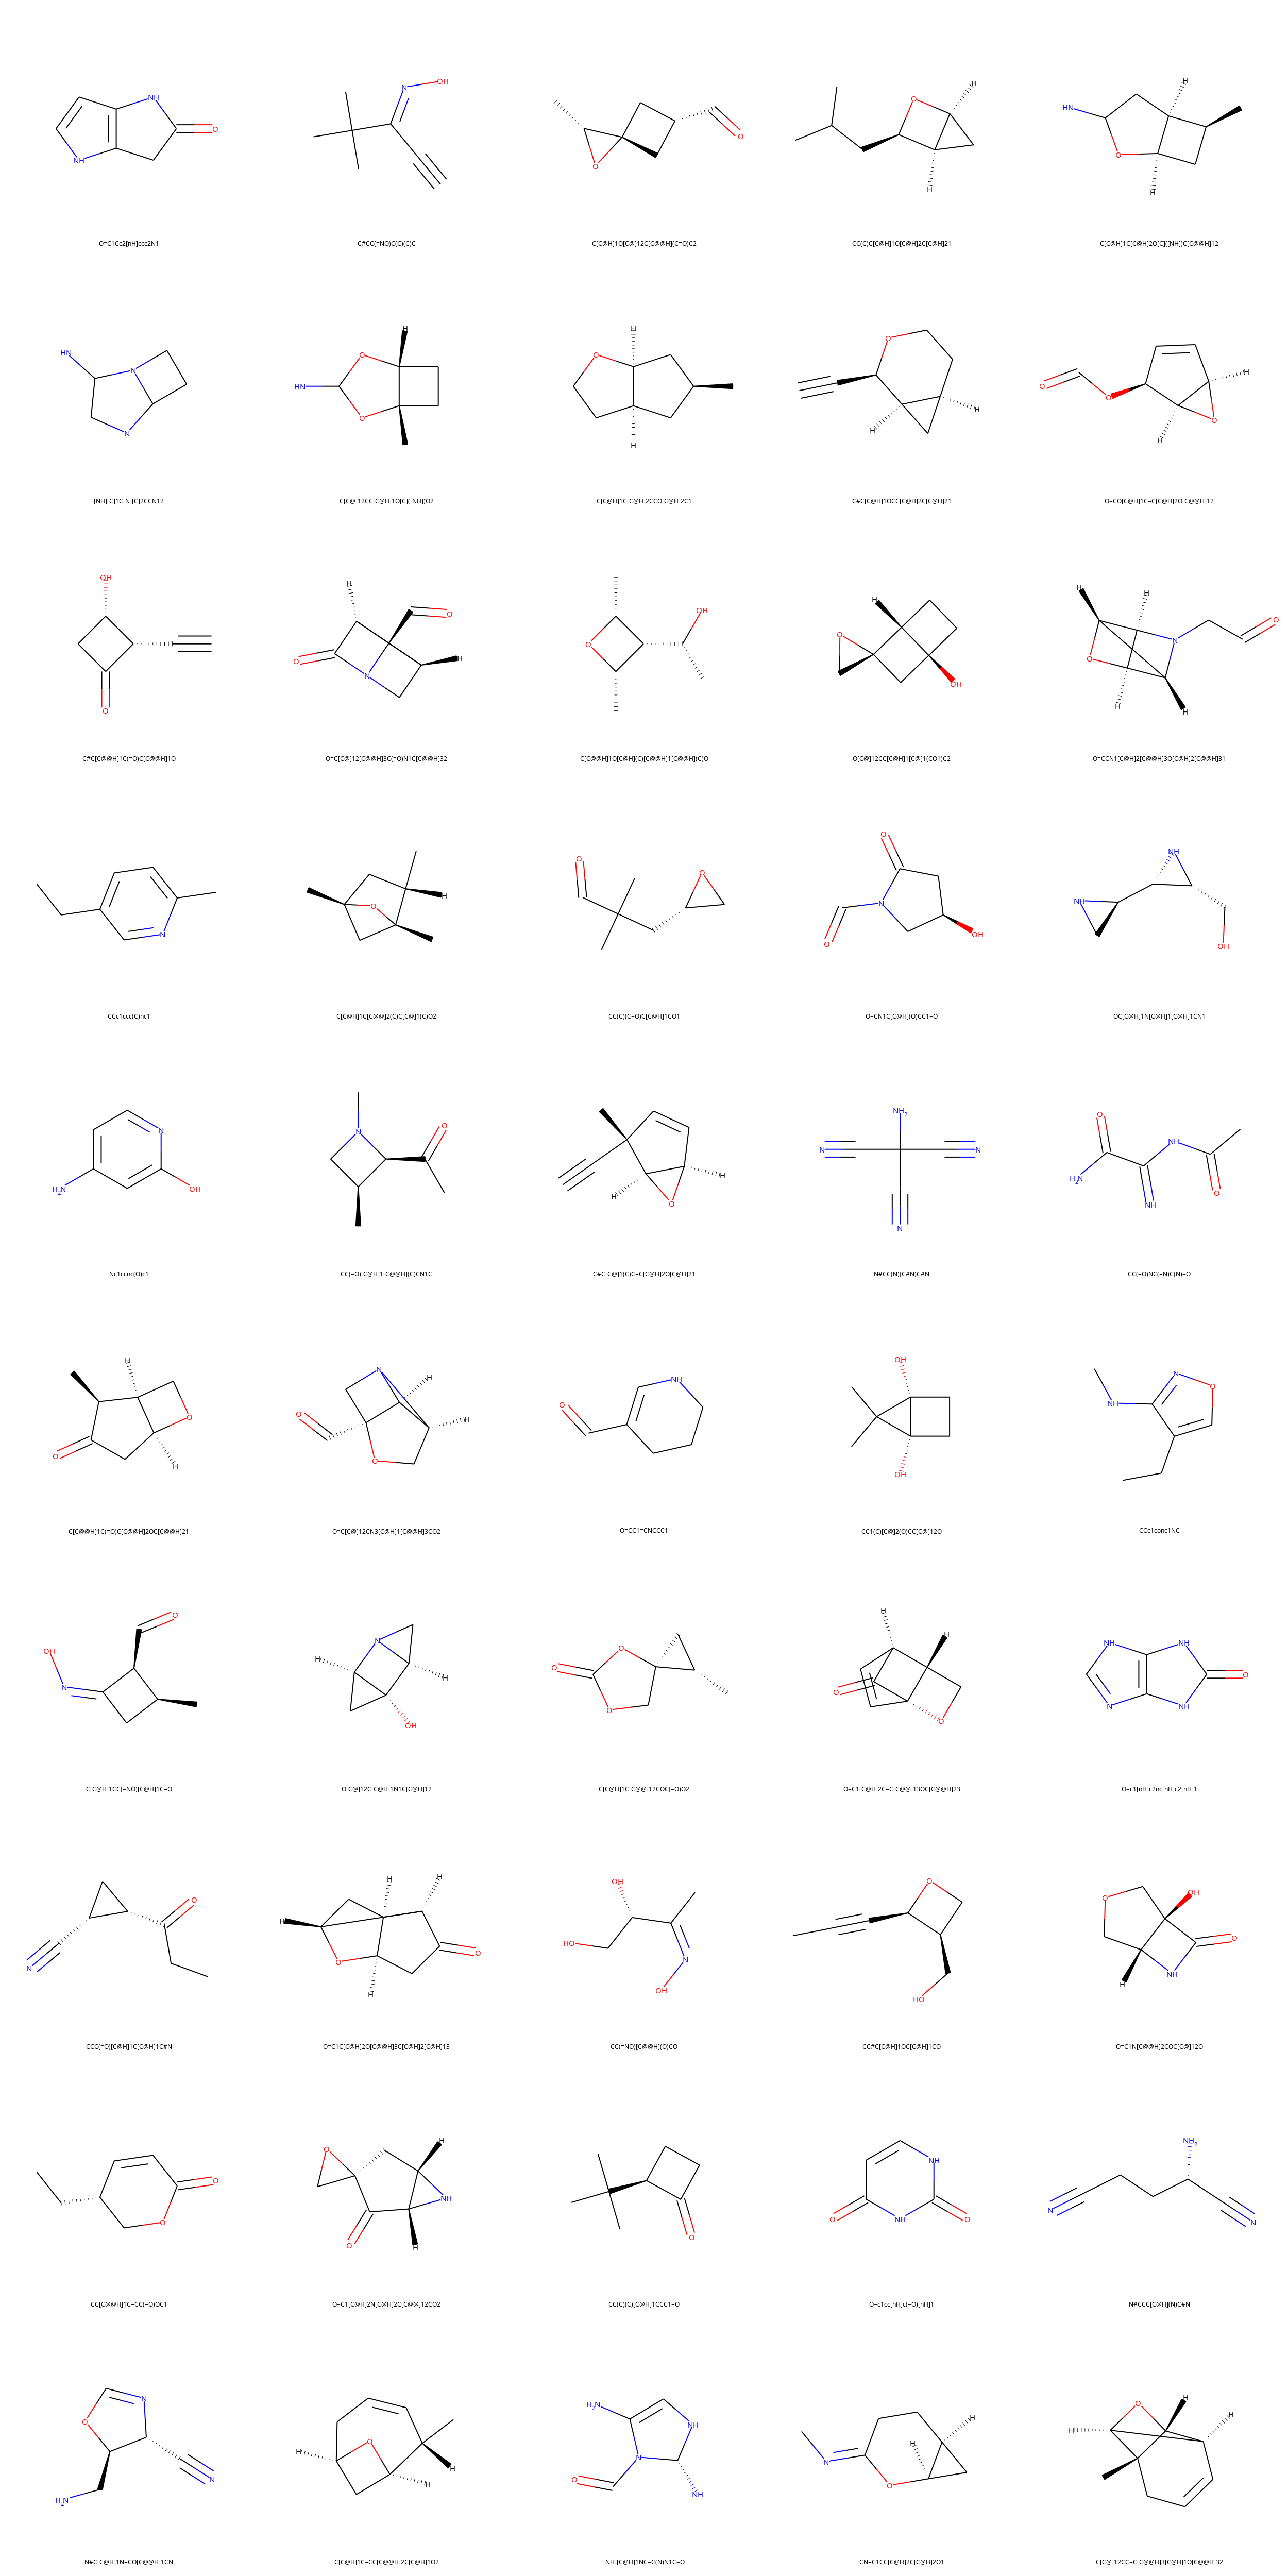

In [4]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['smiles'])[:50]], molsPerRow=5,subImgSize=(500,500), legends=list(inp['smiles'])[:50])
img

In [5]:
'''# Save the unique smiles to a new CSV file
unique_csv_path = './data/qm9_smiles_unique.csv'
inp.to_csv(unique_csv_path, index=False)'''

"# Save the unique smiles to a new CSV file\nunique_csv_path = './data/qm9_smiles_unique.csv'\ninp.to_csv(unique_csv_path, index=False)"

## Train Test Split

In [6]:
'''# Partition the data into 80-20 train-test split
train, test = train_test_split(inp, test_size=0.2, random_state=42)

# Save the train and test data to CSV files
train_csv_path = './data/qm9_smiles_train.csv'
test_csv_path = './data/qm9_smiles_test.csv'

train.to_csv(train_csv_path, index=False)
test.to_csv(test_csv_path, index=False)

# Save only the smiles strings to text files
train_txt_path = './data/qm9_smiles_train.txt'
test_txt_path = './data/qm9_smiles_test.txt'

with open(train_txt_path, 'w') as f:
    for smiles in train['smiles']:
        f.write(smiles + '\n')

with open(test_txt_path, 'w') as f:
    for smiles in test['smiles']:
        f.write(smiles + '\n')'''

"# Partition the data into 80-20 train-test split\ntrain, test = train_test_split(inp, test_size=0.2, random_state=42)\n\n# Save the train and test data to CSV files\ntrain_csv_path = './data/qm9_smiles_train.csv'\ntest_csv_path = './data/qm9_smiles_test.csv'\n\ntrain.to_csv(train_csv_path, index=False)\ntest.to_csv(test_csv_path, index=False)\n\n# Save only the smiles strings to text files\ntrain_txt_path = './data/qm9_smiles_train.txt'\ntest_txt_path = './data/qm9_smiles_test.txt'\n\nwith open(train_txt_path, 'w') as f:\n    for smiles in train['smiles']:\n        f.write(smiles + '\n')\n\nwith open(test_txt_path, 'w') as f:\n    for smiles in test['smiles']:\n        f.write(smiles + '\n')"

## Normalize Properties

In [7]:
average_homo = inp['homo'].mean()
average_lumo = inp['lumo'].mean()
average_r2 = inp['r2'].mean()

std_homo = inp['homo'].std()
std_lumo = inp['lumo'].std()
std_r2 = inp['r2'].std()

print(f'Average HOMO: {average_homo}')
print(f'Average LUMO: {average_lumo}')
print(f'Average R2: {average_r2}')

print(f'std HOMO: {std_homo}')
print(f'std LUMO: {std_lumo}')
print(f'std R2: {std_r2}')

Average HOMO: -0.24132133937470535
Average LUMO: 0.009734840325295804
Average R2: 1206.6448024355188
std HOMO: 0.02182456631867619
std LUMO: 0.04639765091106505
std R2: 283.55181046343085


In [ ]:

# Normalize the properties
inp['normalized_homo'] = (inp['homo'] - average_homo) / std_homo
inp['normalized_lumo'] = (inp['lumo'] - average_lumo) / std_lumo
inp['normalized_r2'] = (inp['r2'] - average_r2) / std_r2

# Calculate and print normalized mean and standard deviation
normalized_mean_homo = inp['normalized_homo'].mean()
normalized_mean_lumo = inp['normalized_lumo'].mean()
normalized_mean_r2 = inp['normalized_r2'].mean()

normalized_std_homo = inp['normalized_homo'].std()
normalized_std_lumo = inp['normalized_lumo'].std()
normalized_std_r2 = inp['normalized_r2'].std()

print(f'Normalized Average HOMO: {normalized_mean_homo}')
print(f'Normalized Average LUMO: {normalized_mean_lumo}')
print(f'Normalized Average R2: {normalized_mean_r2}')

print(f'Normalized std HOMO: {normalized_std_homo}')
print(f'Normalized std LUMO: {normalized_std_lumo}')
print(f'Normalized std R2: {normalized_std_r2}')

# Save the updated dataframe
inp.to_csv('./data/qm9_smiles_prop_normalized.csv', index=False)

Normalized Average HOMO: 1.7018495201372687e-13
Normalized Average LUMO: 1.1641855226453211e-15
Normalized Average R2: 4.387985808935869e-14
Normalized std HOMO: 1.0000000000000282
Normalized std LUMO: 0.9999999999999238
Normalized std R2: 1.0000000000000027


# Vocab Generation

In [9]:
from fast_jtnn.mol_tree import main_mol_tree
#main_mol_tree('./data/qm9_smiles.txt', './data/vocab.txt')

# Preprocessing
For acceleration in code execution

In [10]:
#inside fast_molvae
#python preprocess.py --train ../data/qm9_smiles_train.txt --split 100 --jobs 16 --output qm9_train_data/
#python preprocess.py --train ../data/qm9_smiles_test.txt --split 100 --jobs 16 --output qm9_test_data/

# Training VAE

In [11]:
#python vae_train.py --train ../data/qm9_train_data/ --vocab ../data/vocab.txt --save_dir qm9_train_data/

# Sampling

In [2]:
from fast_molvae.sample_with_latent import main_sample
#main_sample('./data/vocab.txt', './fast_molvae/qm9_train_data/sample.txt', './fast_molvae/qm9_train_data/latent', './fast_molvae/qm9_train_data/model.epoch-19', 1000)

reading vocab
loading model


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


start sampling
0
1


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Exp

2
3
4
5


RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:14:53] Explicit valence for a

6
7
8
9
10
11


[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:53] Explicit 

12
13


RDKit ERROR: [21:14:53] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:53] Explicit valence for atom # 5 C, 6, is greater than permitted
[21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:14:53] Explicit valence for atom # 1 C, 5, is greater than perm

14
15
16
17
18


[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for a

19
20
21
22
23


[21:14:54] Explicit valence for atom # 4 N, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:14:54] Explicit valence for atom # 4 N, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:14:54] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:14:54] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted

24
25
26
27
28


RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:14:54] Explicit valence for a

29
30
31
32
33


RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:54] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:14:54] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:54] Explicit 

34
35
36
37
38


[21:14:55] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:14:55] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:14:55] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:14:55] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for a

39
40
41
42


RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:

43
44
45
46
47


[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:14:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5,

48
49
50


RDKit ERROR: [21:14:55] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:55] Explicit 

51
52
53
54
55


[21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 5 C, 6, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 5, is greater than perm

56
57
58
59
60


[21:14:56] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:56] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:14:56] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:14:56] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 2 N, 5, is greater t

61
62
63
64


RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:56] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:56] Explicit 

65
66
67
68
69
70
71


RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit 

72
73
74
75


[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:14:57] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5,

76
77
78
79


RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 3 

80
81
82
83


RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:57] Explicit 

84
85
86
87
88


[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:14:58] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 O, 4, is greater t

89
90
91
92
93


[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 3 O, 3, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 3 O, 4,

94
95
96
97


RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit E

98
99
100
101
102


RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:58] Explicit valence for a

103
104
105
106
107
108


RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:14:

109
110
111


RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for a

112
113
114
115
116
117
118
119
120


RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:14:59] Explicit 

121
122
123
124


RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:14:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:14:59] Explicit valence for a

125
126
127
128
129


RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:00] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:00] Explicit valence for atom # 6 N, 4, is greater than permitted
[21:15:00] Explicit valence for a

130
131
132


RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater t

133
134
135
136
137
138


[21:15:00] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:00] Explicit valence for atom # 1 C, 5, is greater t

139
140
141
142
143


RDKit ERROR: [21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:00] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:00] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit E

144


[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 5 C, 6, is greater than permitted
[21:15:01] Explicit valence for atom # 3 C, 6, is greater than permitted
[21:15:

145
146
147
148


RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit E

149
150
151
152


[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for a

153
154
155
156


[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:01] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit E

157
158
159
160
161


[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:

162
163
164
165
166


RDKit ERROR: [21:15:02] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:02] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for a

167
168
169
170
171


[21:15:02] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for a

172
173
174
175
176
177


RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:02] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:02] Explicit valence for a

178
179
180
181


[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:02] Explicit valence for atom # 3 C, 5, is g

182
183
184
185
186


RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:03] Explicit 

187
188
189


RDKit ERROR: [21:15:03] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:03] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:03] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:03] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:

190
191
192


RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:03] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

193
194
195
196
197
198


RDKit ERROR: [21:15:04] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:04] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:04] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 3 O, 3, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for a

199
200
201
202


RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:04] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for a

203
204
205
206
207


RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 6,

208
209
210
211
212


RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 6 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 6 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for a

213
214
215
216
217


RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:04] Explicit valence for a

218
219
220
221
222


RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 5, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 5, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 6 N, 4, is greater than perm

223
224
225
226
227
228


RDKit ERROR: [21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for a

229
230
231
232
233
234


RDKit ERROR: [21:15:05] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:05] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:05] Explicit valence for atom # 3 C, 6, is greater than permitted
[21:15:05] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:05] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:

235
236
237
238
239


RDKit ERROR: [21:15:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:05] Explicit valence for atom # 3 N, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:05] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:05] Explicit valence for atom # 4 N, 5, is greater than permitted
[21:15:05] Explicit valence for atom #

240
241
242
243
244


[21:15:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater t

245
246
247
248


[21:15:06] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:

249


RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[21:15:06] Explicit 

250
251
252
253
254
255


RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:06] Explicit 

256
257
258
259


[21:15:07] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 2 O, 4, is greater than permitted
[21:15:07] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for a

260
261
262


RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 2 C, 5, is greater than perm

263
264
265
266


RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR:

267
268
269
270
271
272


RDKit ERROR: [21:15:07] Explicit valence for atom # 5 O, 4, is greater than permitted
[21:15:07] Explicit valence for atom # 5 O, 4, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 5 O, 4, is greater than permitted
[21:15:07] Explicit valence for atom # 5 O, 4, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:07] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:07] Explicit valence for a

273
274
275
276


RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:08] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:08] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:08] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 N, 5, is greater than permitted
[21:15:08] Explicit 

277
278
279
280
281
282


RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for a

283
284
285
286
287


RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for a

288
289


[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:08] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:08] Explicit valence for a

290
291
292
293


RDKit ERROR: [21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 6, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 6, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 3 C, 5,

294
295


RDKit ERROR: [21:15:09] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:09] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:09] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:09] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:09] Explicit 

296
297
298


[21:15:09] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5,

299
300
301
302
303


RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:09] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:09] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:09] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:09] Explicit valence for a

304
305
306
307
308


RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for a

309
310
311
312
313


RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for a

314
315
316


RDKit ERROR: [21:15:10] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 4 N, 4, is greater than permitted
reater than permitted
[21:15:10] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:10] Explicit valence for atom # 7 N, 4, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21

317
318
319
320
321


RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:10] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for a

322
323
324
325


[21:15:11] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit E

326
327
328
329
330


RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for a

331
332
333
334
335


RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

336
337
338
339


[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for atom # 4 N, 5, is greater than permitted
RDKit ERROR: [21:15:11] Explicit valence for a

340
341
342
343


RDKit ERROR: [21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:12] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:

344
345
346
347
348
349


RDKit ERROR: [21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:12] Explicit valence for atom # 3 C, 5, is greater than perm

350
351
352
353
354


RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for a

355
356


RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit 

357
358
359
360
361
362
363
364
365
366
367
368


RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:13] Explicit 

369
370
371
372
373


RDKit ERROR: [21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:13] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:

374
375
376
377
378


RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 3 O, 3, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit 

379
380
381


RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit E

382
383
384
385
386


[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:14] Explicit 

387
388
389
390


RDKit ERROR: [21:15:15] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 6, is greater than permitted


391
392
393
394


RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit E

395
396
397
398
399


RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:15] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for a

400
401
402
403
404


RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:15] Explicit 

405
406
407
408
409


RDKit ERROR: [21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:15] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 N, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for a

410


RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 6 N, 4, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [21:15:

411
412
413


[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:16] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for a

414
415
416
417


RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit 

418
419
420
421
422


RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:16] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit E

423
424
425
426


RDKit ERROR: [21:15:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is grea

427
428
429
430
431


RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:

432
433
434


RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:

435
436
437
438
439


RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:17] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:

440
441
442
443
444


RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:17] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:17] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:17] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:17] Explicit valence for atom # 1 C, 5, is greater t

445
446
447
448
449


RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit E

450
451


RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] E

452
453
454
455
456
457


[21:15:18] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:18] Explicit valence for atom # 2 N, 4,

458
459
460
461
462


RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:18] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:18] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:18] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

463
464
465
466
467


RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit E

468
469
470
471
472


RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:19] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:19] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:19] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for a

473
474
475
476


RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:19] Explicit valence for atom # 3 O, 3, is greater than permitted
[21:15:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:19] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [21:15:19] Explicit valence for a

477
478
479


[21:15:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:19] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater t

480
481
482
483
484
485


RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for a

486
487
488
489
490


RDKit ERROR: [21:15:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:20] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:20] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:20] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for a

491
492
493
494
495
496


[21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for a

497
498
499
500
501


RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:20] Explicit 

502
503
504
505
506
507


RDKit ERROR: [21:15:21] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:21] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:21] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:21] Explicit 

508
509
510


RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit E

511
512
513
514
515
516


RDKit ERROR: [21:15:21] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:21] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:21] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:21] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:21] Explicit valence for atom # 1 O, 3, is greater than permitted


517
518
519
520
521


RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:21] Explicit valence for a

522
523
524
525
526


[21:15:21] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:22] Explicit valence for a

527
528
529
530
531


RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit 

532
533
534
535
536


RDKit ERROR: [21:15:22] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:22] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:22] Explicit valence for a

537
538
539
540
541


RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:22] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:22] Explicit valence for a

542
543
544
545
546


RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for a

547
548
549
550


RDKit ERROR: [21:15:23] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater t

551
552
553
554
555


RDKit ERROR: [21:15:23] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:23] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for a

556
557
558
559
560


[21:15:23] Explicit valence for atom # 1 N, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 N, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 N, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:23] Explicit valence for atom # 1 C, 5, is greater t

561
562
563
564
565


RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

566
567
568
569


RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 6 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 3 C, 5, is greater t

570
571
572
573


RDKit ERROR: [21:15:24] Explicit valence for atom # 3 O, 3, is greater than permitted
[21:15:24] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for a

574
575
576
577


RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:

578
579
580


RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 5, is greater than perm

581
582
583
584


[21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:25] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:25] Explicit valence for a

585
586
587
588
589


RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than perm

590
591
592
593
594
595


[21:15:25] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:25] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:25] Explicit valence for atom # 2 C, 5,

596
597
598
599
600
601


RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for a

602
603
604
605
606
607


[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for a

608
609
610
611
612


RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:26] Explicit valence for a

613
614
615
616
617


RDKit ERROR: [21:15:26] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:26] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:26] Explicit valence for atom # 2 N, 5, is greater than perm

618
619
620
621
622
623


RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:26] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:26] Explicit valence for a

624
625
626
627
628
629


RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for a

630
631
632
633
634


RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than perm

635
636
637
638
639
640


RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:27] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for a

641
642
643
644
645


RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:27] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:27] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:27] Explicit valence for a

646
647
648
649
650


RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit 

651
652
653


RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5,

654
655
656
657


RDKit ERROR: [21:15:28] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:28] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 2 N, 4, is greater than perm

658
659
660
661
662


[21:15:28] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 4 N, 4,

663
664
665
666


RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:29] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit E

667
668
669
670
671


RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

672
673
674
675


RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:29] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:29] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:

676
677
678
679
680
681


RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for a

682
683
684
685
686
687


RDKit ERROR: [21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:30] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for a

688
689
690
691
692


RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than perm

693
694
695
696


[21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:30] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:

697
698
699
700


[21:15:30] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5,

701
702
703
704


RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:30] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:30] Explicit 

705
706
707
708
709
710


RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:31] Explicit 

711
712
713
714
715


RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit 

716
717
718
719
720


RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit E

721
722
723
724


RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 4 N, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:31] Explicit valence for atom # 6 N, 4, is grea

725
726


[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 5 N, 4, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 6, is greater t

727
728
729
730
731


RDKit ERROR: [21:15:32] Explicit valence for atom # 5 O, 4, is greater than permitted
[21:15:32] Explicit valence for atom # 5 O, 4, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 O, 4, is greater than perm

732
733
734


RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit 

735
736
737
738


RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:32] Explicit 

739
740
741
742
743


RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:32] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [21:15:

744
745
746
747


RDKit ERROR: [21:15:33] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:33] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:33] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:33] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:33] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:

748
749
750
751


RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:33] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:33] Explicit valence for a

752
753
754
755


[21:15:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:33] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:15:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:15:33] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:15:33] Explicit valence for atom # 9 O, 3, is greater than permitted
[21:15:33] Explicit valence for atom # 6 C, 5, is greater than permitted
[21:15:33] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:33] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:33] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:33] Explicit valence for atom # 1 C, 5, is greater than permitted

756
757
758
759
760


RDKit ERROR: [21:15:34] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:34] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 O, 4, is greater than permitted
[21:15:34] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for a

761
762
763
764
765


RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for a

766
767
768
769


RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:34] Explicit 

770
771
772
773
774


RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 4 O, 3, is greater than permitted
[21:15:34] Explicit valence for atom # 6 O, 3, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:34] Explicit 

775
776
777
778
779
780


[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:34] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:34] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:34] Explicit valence for a

781
782
783
784


RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for a

785
786
787
788
789


RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 N, 6, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:35] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:35] Explicit valence for atom # 1 N, 6, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 N, 6, is greater than permitted
[21:15:35] Explicit valence for atom # 1 N, 6, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for a

790
791
792
793
794
795


[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 4 C, 5,

796
797
798
799


RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 4 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for a

800
801
802
803


RDKit ERROR: [21:15:35] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:35] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:35] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

804
805
806
807
808


[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5,

809
810
811
812


[21:15:36] Explicit valence for atom # 3 O, 4, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:36] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:36] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:36] Explicit valence for atom # 5 O, 3, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted

813
814
815
816


RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:36] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:

817
818
819
820
821


[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 3 N, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:37] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted

822
823
824
825


RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:37] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:37] Explicit 

826
827
828
829


RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:15:37] Explicit 

830
831
832
833


RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:15:37] Explicit valence for atom # 1 C, 5, is greater t

834
835
836
837


RDKit ERROR: [21:15:38] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:38] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:38] Explicit 

838
839
840


RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:

841
842
843
844


RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit 

845
846
847
848
849
850


RDKit ERROR: [21:15:38] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:38] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit 

851
852
853
854
855


RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:38] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:38] Explicit valence for a

856
857
858
859
860


RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for a

861
862


RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for a

863
864
865
866
867


RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 2 C, 5, is greater t

868
869
870
871
872
873


RDKit ERROR: [21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for a

874
875
876
877


reater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 6, is 

878
879
880
881
882


RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:40] Explicit valence for a

883
884
885
886
887
888


RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for a

889
890
891


[21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:40] Explicit valence for atom # 1 C, 6, is greater than permitted

892
893
894
895
896


RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for a

897
898
899
900


RDKit ERROR: [21:15:41] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:41] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:15:41] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for a

901
902
903
904
905


RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than perm

906
907
908
909
910
911


RDKit ERROR: [21:15:41] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:41] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:41] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:41] Explicit valence for a

912
913
914
915


RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for a

916
917
918
919


[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 3 N, 4,

920
921
922


RDKit ERROR: [21:15:42] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:42] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 N, 4, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:42] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit 

923
924
925
926
927
928
929
930
931


RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:42] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:42] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:

932
933
934
935
936


RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for a

937
938
939
940
941


RDKit ERROR: [21:15:43] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater t

942
943
944


[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:43] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:43] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:43] Explicit valence for atom # 1 O, 3,

945
946
947
948


RDKit ERROR: [21:15:44] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 7, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 7, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for a

949
950
951
952
953
954
955
956
957
958


RDKit ERROR: [21:15:44] Explicit valence for atom # 3 N, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 3 N, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 3 N, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is grea

959
960


RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for a

961
962
963
964
965


RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:44] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 O, 3, is greater than permitted
[21:15:44] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for atom # 1 O, 4, is greater than permitted
[21:15:44] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:15:44] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:44] Explicit valence for a

966
967
968
969
970
971


RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for a

972
973
974
975
976
977


RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 O, 4, is greater than permitted
RDKit ERROR: [21:15:45] Explicit 

978
979
980
981


RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 6, is greater than permitted
[21:15:45] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 3 C, 6, is grea

982
983
984


RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 2 N, 4, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:45] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [21:15:45] Explicit valence for atom # 1 C, 5,

985
986
987
988


[21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:46] Explicit valence for atom # 5 N, 4, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:15:46] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 N, 4, is greater t

989
990
991
992
993


[21:15:46] Explicit valence for atom # 1 C, 6, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 5,

994
995
996
997
998
999


RDKit ERROR: [21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:15:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 2 C, 7, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 4 C, 7, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for atom # 5 C, 6, is greater than permitted
[21:15:46] Explicit valence for atom # 4 C, 6, is greater than permitted
[21:15:46] Explicit valence for atom # 2 C, 7, is greater than permitted
[21:15:46] Explicit valence for atom # 5 C, 6, is greater than permitted
[21:15:46] Explicit valence for atom # 4 C, 7, is greater than permitted
[21:15:46] Explicit valence for atom # 5 C, 6, is greater than permitted
RDKit ERROR: [21:15:46] Explicit valence for a

Error encoding SMILES: 'C1=CO1', SMILES: CC1C2=C(CC1O)O2
Error encoding SMILES: 'C1=CN1', SMILES: Cc1[nH]c2[nH]c=2oc1N


In [3]:
out = pd.read_csv('./fast_molvae/qm9_train_data/sample.txt', names=['SMILES'])

In [4]:
out['INCHI'] = out['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))

In [5]:
out

SMILES                        INCHI
0       C#CC(O)CC(C)=O  NBCCNVNKIYDQLV-UHFFFAOYSA-N
1        CC1OC2C=CNC12  NEDSJLPUFCFSMC-UHFFFAOYSA-N
2          C#CC(C)OC=O  HLAFEOSSQKSUSK-UHFFFAOYSA-N
3     CC(=O)C1(C#N)CO1  LITFNVPUMICBQR-UHFFFAOYSA-N
4    CC1CC(C)C12OC2C=O  XEMOVAHZECMKHZ-UHFFFAOYSA-N
..                 ...                          ...
995     CC#CC1C2CNC1C2  SLBGLMFWLJBUDQ-UHFFFAOYSA-N
996  CC(O)C1CC2(CN2)C1  AFPFOGNYZFXKOW-UHFFFAOYSA-N
997      O=C1NC1C1CC1O  MWJWIGXMMMFPAG-UHFFFAOYSA-N
998     C#CC(N)OC1CCC1  NVOREIVUHLGZJP-UHFFFAOYSA-N
999  Nc1coc(=O)n1C1CC1  LLHBVENOORHDLT-UHFFFAOYSA-N

[1000 rows x 2 columns]

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


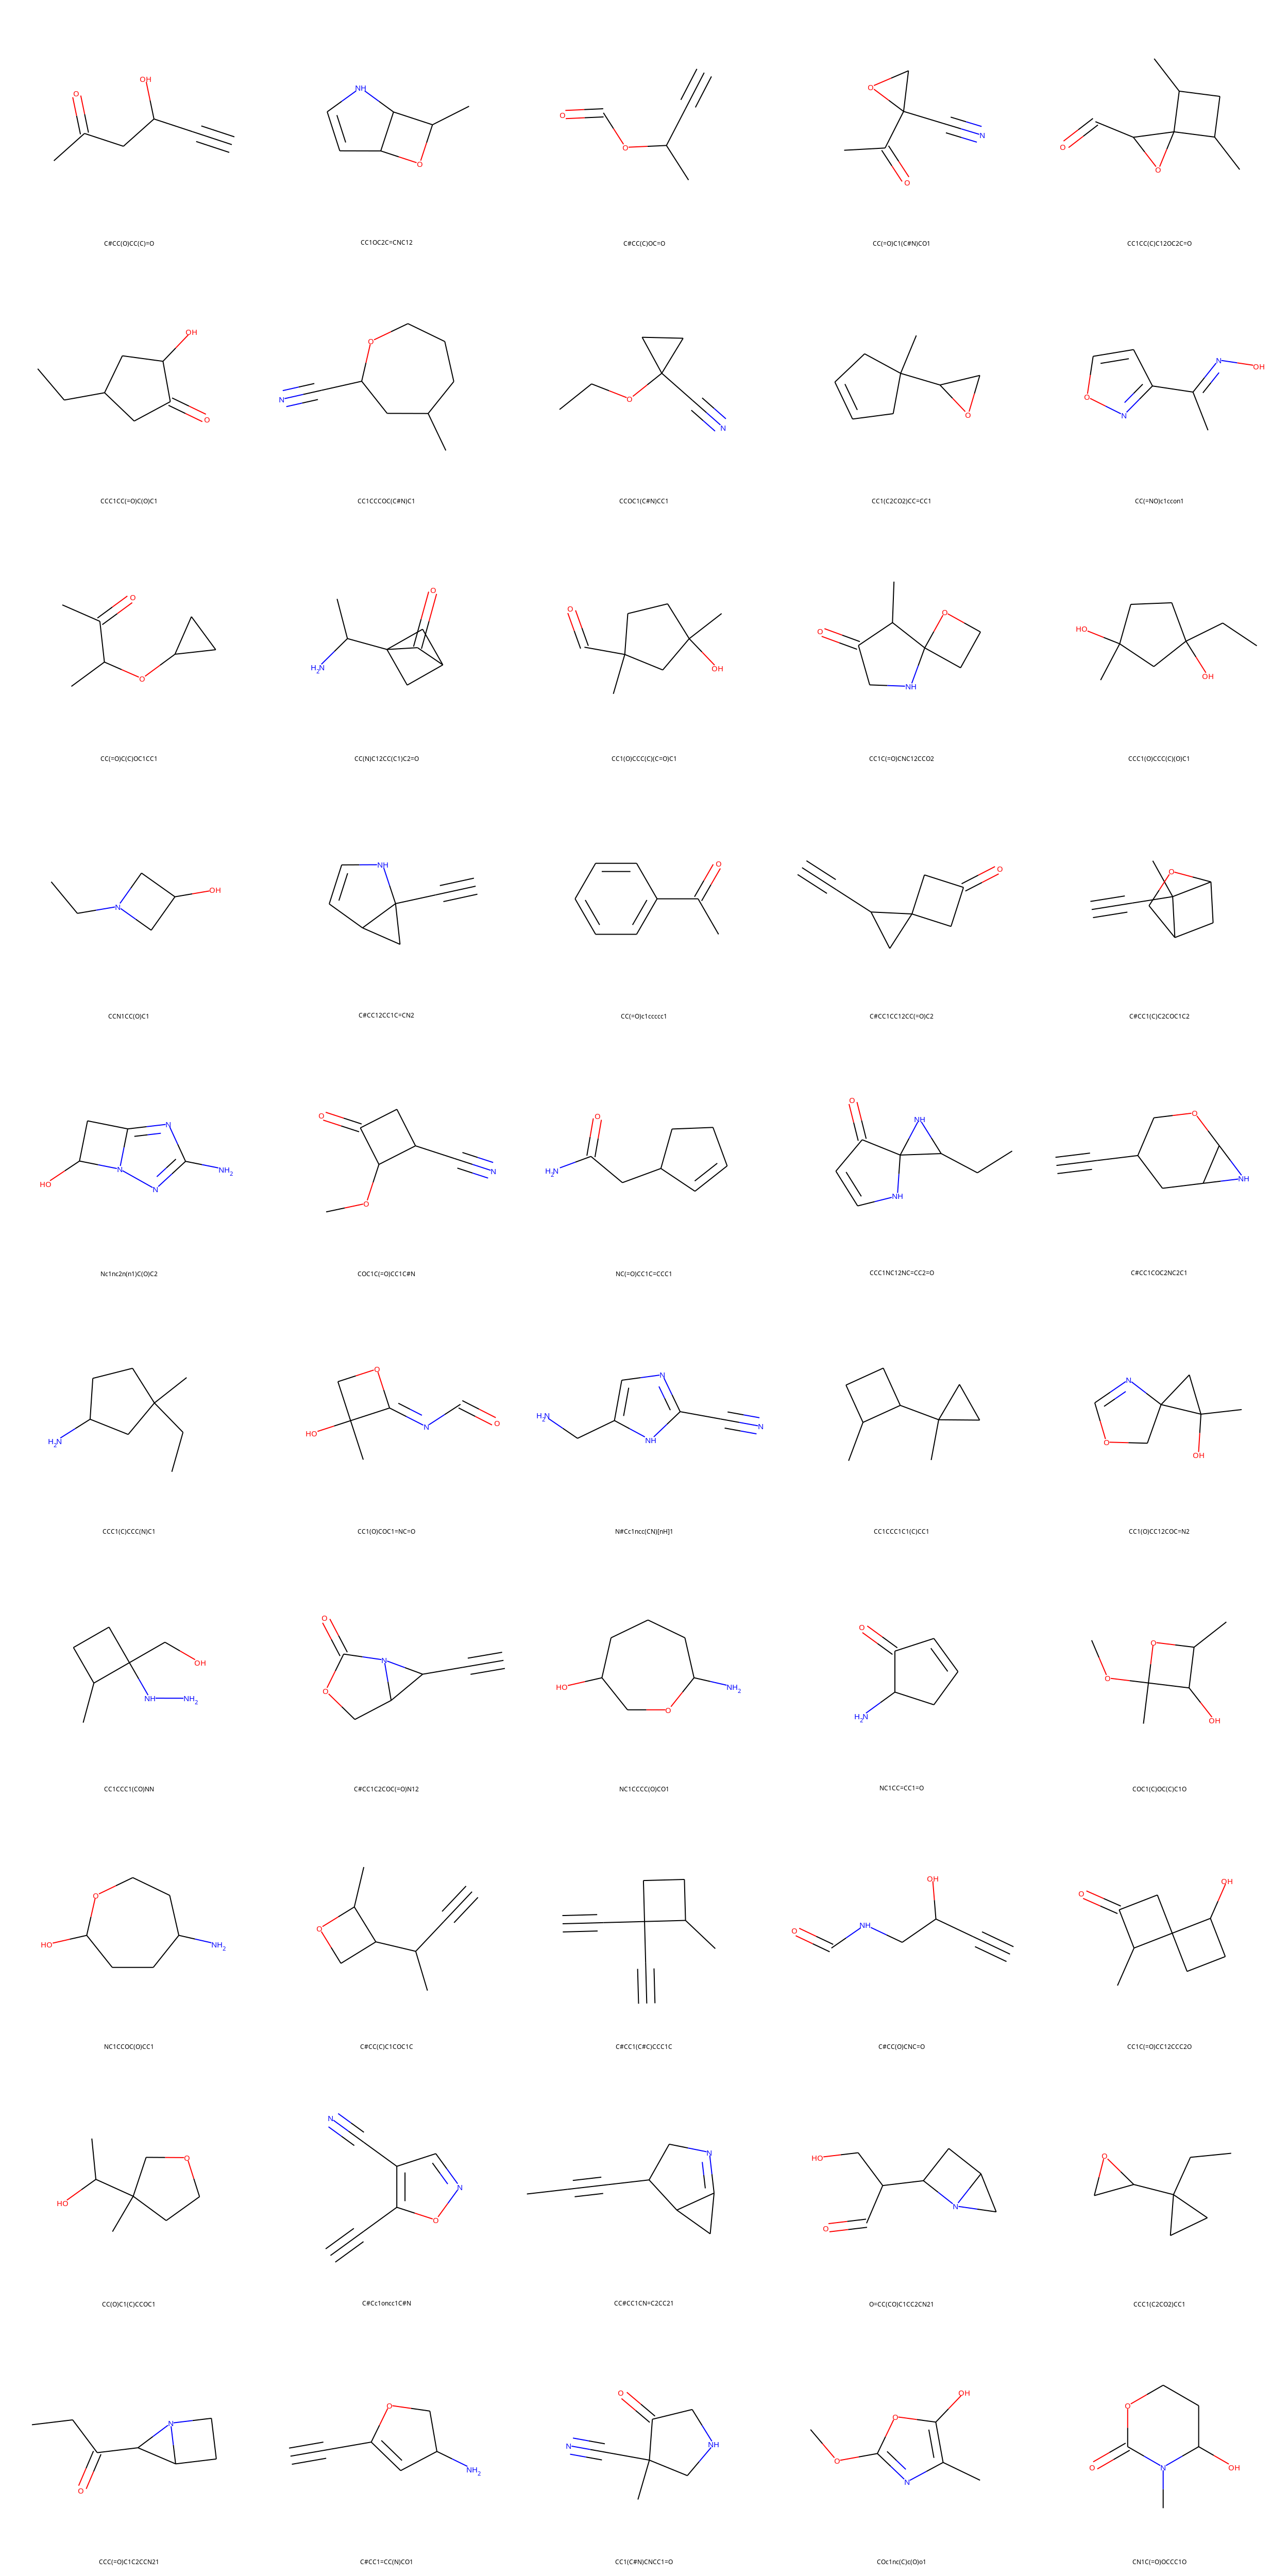

In [6]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(out['SMILES'])[:100]], molsPerRow=5,subImgSize=(500,500), legends=list(out['SMILES'])[:100])
img

## Validity

In [7]:
def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

In [8]:
valid_samples = 0
out['Valid'] = out['SMILES'].apply(is_valid_smiles)
valid_samples = out['Valid'].sum()
print("Number of valid samples:", valid_samples)

Number of valid samples: 1000


In [9]:
out

SMILES                        INCHI  Valid
0       C#CC(O)CC(C)=O  NBCCNVNKIYDQLV-UHFFFAOYSA-N   True
1        CC1OC2C=CNC12  NEDSJLPUFCFSMC-UHFFFAOYSA-N   True
2          C#CC(C)OC=O  HLAFEOSSQKSUSK-UHFFFAOYSA-N   True
3     CC(=O)C1(C#N)CO1  LITFNVPUMICBQR-UHFFFAOYSA-N   True
4    CC1CC(C)C12OC2C=O  XEMOVAHZECMKHZ-UHFFFAOYSA-N   True
..                 ...                          ...    ...
995     CC#CC1C2CNC1C2  SLBGLMFWLJBUDQ-UHFFFAOYSA-N   True
996  CC(O)C1CC2(CN2)C1  AFPFOGNYZFXKOW-UHFFFAOYSA-N   True
997      O=C1NC1C1CC1O  MWJWIGXMMMFPAG-UHFFFAOYSA-N   True
998     C#CC(N)OC1CCC1  NVOREIVUHLGZJP-UHFFFAOYSA-N   True
999  Nc1coc(=O)n1C1CC1  LLHBVENOORHDLT-UHFFFAOYSA-N   True

[1000 rows x 3 columns]

## Uniqueness

In [10]:
unique_samples = out
unique_samples = unique_samples.drop_duplicates(subset=['INCHI'], keep='first')
unique_samples

SMILES                        INCHI  Valid
0       C#CC(O)CC(C)=O  NBCCNVNKIYDQLV-UHFFFAOYSA-N   True
1        CC1OC2C=CNC12  NEDSJLPUFCFSMC-UHFFFAOYSA-N   True
2          C#CC(C)OC=O  HLAFEOSSQKSUSK-UHFFFAOYSA-N   True
3     CC(=O)C1(C#N)CO1  LITFNVPUMICBQR-UHFFFAOYSA-N   True
4    CC1CC(C)C12OC2C=O  XEMOVAHZECMKHZ-UHFFFAOYSA-N   True
..                 ...                          ...    ...
995     CC#CC1C2CNC1C2  SLBGLMFWLJBUDQ-UHFFFAOYSA-N   True
996  CC(O)C1CC2(CN2)C1  AFPFOGNYZFXKOW-UHFFFAOYSA-N   True
997      O=C1NC1C1CC1O  MWJWIGXMMMFPAG-UHFFFAOYSA-N   True
998     C#CC(N)OC1CCC1  NVOREIVUHLGZJP-UHFFFAOYSA-N   True
999  Nc1coc(=O)n1C1CC1  LLHBVENOORHDLT-UHFFFAOYSA-N   True

[992 rows x 3 columns]

## Novelty

In [12]:
train_data = pd.read_csv('/home/ece/Inverse-Design-For-Molecules/data/qm9_smiles_train.txt', names=['SMILES'])
train_data['INCHI'] = train_data['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
train_data

SMILES                        INCHI
0          COCC[C@H]1C[C@H]2O[C@@H]12  AMQUFEGIAIMJCJ-XVMARJQXSA-N
1                   C[C@@H](O)CCCCC=O  GOSPSGSNORWRSV-SSDOTTSWSA-N
2             CC[C@@]1([C@H]2CN2C)CO1  DUZVCRNPOCWVPH-KVARREAHSA-N
3                 CCN1N=NN[C@@H]1[NH]  WDFHTNWFAYABDV-VKHMYHEASA-N
4         C#C[C@H]1C[C@H]2CO[C@@H]1C2  APGYAFYQFLRXJW-GJMOJQLCSA-N
...                               ...                          ...
95514                  C#CCCCC1(O)CC1  FALCWAKDZGTQQM-UHFFFAOYSA-N
95515             CC1(C)OC[C]([NH])O1  JWAYSRPLGVXBDG-UHFFFAOYSA-N
95516       C[C@@H](CC#N)[C@@]1(C)CN1  QCISGJMKZKDCGK-NKWVEPMBSA-N
95517  C#C[C@@]12C[C@@]3(C)CN1[C@H]32  OLIQRWVMQXDDCB-ROVKLQMOSA-N
95518                     CN=COCC#CCO  XAJXJMZZSWCBNP-UHFFFAOYSA-N

[95519 rows x 2 columns]

In [13]:
novel_molecules = out[~out['INCHI'].isin(train_data['INCHI'])]
novel_molecules

SMILES                        INCHI  Valid
0       C#CC(O)CC(C)=O  NBCCNVNKIYDQLV-UHFFFAOYSA-N   True
1        CC1OC2C=CNC12  NEDSJLPUFCFSMC-UHFFFAOYSA-N   True
2          C#CC(C)OC=O  HLAFEOSSQKSUSK-UHFFFAOYSA-N   True
3     CC(=O)C1(C#N)CO1  LITFNVPUMICBQR-UHFFFAOYSA-N   True
4    CC1CC(C)C12OC2C=O  XEMOVAHZECMKHZ-UHFFFAOYSA-N   True
..                 ...                          ...    ...
995     CC#CC1C2CNC1C2  SLBGLMFWLJBUDQ-UHFFFAOYSA-N   True
996  CC(O)C1CC2(CN2)C1  AFPFOGNYZFXKOW-UHFFFAOYSA-N   True
997      O=C1NC1C1CC1O  MWJWIGXMMMFPAG-UHFFFAOYSA-N   True
998     C#CC(N)OC1CCC1  NVOREIVUHLGZJP-UHFFFAOYSA-N   True
999  Nc1coc(=O)n1C1CC1  LLHBVENOORHDLT-UHFFFAOYSA-N   True

[895 rows x 3 columns]

In [14]:
novel_unique_molecules = unique_samples[~unique_samples['INCHI'].isin(train_data['INCHI'])]
novel_unique_molecules

SMILES                        INCHI  Valid
0       C#CC(O)CC(C)=O  NBCCNVNKIYDQLV-UHFFFAOYSA-N   True
1        CC1OC2C=CNC12  NEDSJLPUFCFSMC-UHFFFAOYSA-N   True
2          C#CC(C)OC=O  HLAFEOSSQKSUSK-UHFFFAOYSA-N   True
3     CC(=O)C1(C#N)CO1  LITFNVPUMICBQR-UHFFFAOYSA-N   True
4    CC1CC(C)C12OC2C=O  XEMOVAHZECMKHZ-UHFFFAOYSA-N   True
..                 ...                          ...    ...
995     CC#CC1C2CNC1C2  SLBGLMFWLJBUDQ-UHFFFAOYSA-N   True
996  CC(O)C1CC2(CN2)C1  AFPFOGNYZFXKOW-UHFFFAOYSA-N   True
997      O=C1NC1C1CC1O  MWJWIGXMMMFPAG-UHFFFAOYSA-N   True
998     C#CC(N)OC1CCC1  NVOREIVUHLGZJP-UHFFFAOYSA-N   True
999  Nc1coc(=O)n1C1CC1  LLHBVENOORHDLT-UHFFFAOYSA-N   True

[889 rows x 3 columns]

# Property Prediction

## Train Property Prediction Model

In [20]:
#python train.py  --vocab ../data/vocab.txt --model ../fast_molvae/qm9_train_data/model.epoch-19 --output ./pp_model_seperately_trained --train_data ../data/qm9_smiles_train.csv --test_data ../data/qm9_smiles_test.csv

## Load property predictor and vae

In [9]:
from property_prediction.train import *

# Paths to model and vocab files
model_path = 'property_prediction/pp_model_seperately_trained/property_predictor.pth'
vocab_path = './data/vocab.txt'
model_path_jtvae = 'fast_molvae/qm9_train_data/model.epoch-19'

# Load the saved state dictionary
saved_state = torch.load(model_path)

# Extract model state dictionary and normalization parameters
model_state_dict = saved_state['model_state_dict']
y_mean = saved_state['y_mean']
y_std = saved_state['y_std']

# Initialize and load the PropertyPredictor model
input_size = 56
hidden_size = 256
predictor = PropertyPredictor(input_size, hidden_size)
predictor.load_state_dict(model_state_dict)
predictor = predictor.cuda()
predictor.eval()

# Load JTNNVAE model
vocab = Vocab([x.strip("\r\n ") for x in open(vocab_path)])
vae_model = JTNNVAE(vocab, 450, 56, 20, 3)
vae_model.load_state_dict(torch.load(model_path_jtvae))
vae_model = vae_model.cuda()


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Prediction on Entire Data

In [14]:
'''entire_data = pd.read_csv('./data/qm9_smiles_unique.csv')

smiles_list_entire = entire_data['smiles'].tolist()
latent_points_entire = []
batch_size = 32
for i in range(0, len(smiles_list_entire), batch_size):
    batch = smiles_list_entire[i:i+batch_size]
    mol_vec = vae_model.encode_from_smiles(batch)
    latent_points_entire.append(mol_vec.data.cpu().numpy())
latent_points_entire = np.vstack(latent_points_entire)

# Prepare dataset and dataloader
dataset = TensorDataset(torch.tensor(latent_points_entire).float())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Make predictions
predictions_entire = []
with torch.no_grad():
    for batch in dataloader:
        x = batch[0].cuda()
        preds = predictor(x)
        predictions_entire.append(preds.cpu().numpy())
predictions_entire = np.vstack(predictions_entire)

# Add predictions to DataFrame
#CHANGE THIS WITH MEAN AND STD
entire_data['pred_homo_mean'] = predictions_entire[:, 0]
entire_data['pred_lumo_mean'] = predictions_entire[:, 1]
entire_data['pred_r2_mean'] = predictions_entire[:, 2]

entire_data['pred_homo_std'] = predictions_entire[:, 3]
entire_data['pred_lumo_std'] = predictions_entire[:, 4]
entire_data['pred_r2_std'] = predictions_entire[:, 5]

# Display the DataFrame with predictions
entire_data

# Denormalize the predicted values
entire_data['pred_homo_mean'] = (entire_data['pred_homo_mean'] * y_std[0]) + y_mean[0]
entire_data['pred_lumo_mean'] = (entire_data['pred_lumo_mean'] * y_std[1]) + y_mean[1]
entire_data['pred_r2_mean'] = (entire_data['pred_r2_mean'] * y_std[2]) + y_mean[2]

# Calculate real average values
average_homo = entire_data['homo'].mean()
average_lumo = entire_data['lumo'].mean()
average_r2 = entire_data['r2'].mean()

# Calculate real standard deviations
std_homo = entire_data['homo'].std()
std_lumo = entire_data['lumo'].std()
std_r2 = entire_data['r2'].std()

# Calculate predicted average values
average_homo_predicted = entire_data['pred_homo_mean'].mean()
average_lumo_predicted = entire_data['pred_lumo_mean'].mean()
average_r2_predicted = entire_data['pred_r2_mean'].mean()

# Calculate predicted standard deviations
std_homo_predicted = entire_data['pred_homo_mean'].std()
std_lumo_predicted = entire_data['pred_lumo_mean'].std()
std_r2_predicted = entire_data['pred_r2_mean'].std()

# Print real average values and standard deviations
print('Real:')
print(f'Average HOMO: {average_homo}')
print(f'Standard Deviation HOMO: {std_homo}')
print(f'Average LUMO: {average_lumo}')
print(f'Standard Deviation LUMO: {std_lumo}')
print(f'Average R2: {average_r2}')
print(f'Standard Deviation R2: {std_r2}')

# Print predicted average values and standard deviations
print('Predicted:')
print(f'Average HOMO: {average_homo_predicted}')
print(f'Standard Deviation HOMO: {std_homo_predicted}')
print(f'Average LUMO: {average_lumo_predicted}')
print(f'Standard Deviation LUMO: {std_lumo_predicted}')
print(f'Average R2: {average_r2_predicted}')
print(f'Standard Deviation R2: {std_r2_predicted}')'''

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Real:
Average HOMO: -0.24132133937470535
Standard Deviation HOMO: 0.02182456631867619
Average LUMO: 0.009734840325295804
Standard Deviation LUMO: 0.04639765091106505
Average R2: 1206.6448024355188
Standard Deviation R2: 283.55181046343085
Predicted:
Average HOMO: -0.2410968840122223
Standard Deviation HOMO: 0.013828904367983341
Average LUMO: 0.01007097214460373
Standard Deviation LUMO: 0.03407349810004234
Average R2: 1197.4637451171875
Standard Deviation R2: 225.7071075439453


In [16]:
'''csv_filename = 'property_prediction_on_entire_data_sep_train.csv'
entire_data.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")'''

Data saved to property_prediction_on_entire_data_sep_train.csv


### Using mean values as predictions

In [18]:
entire_data = pd.read_csv('property_prediction_on_entire_data_sep_train.csv')

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

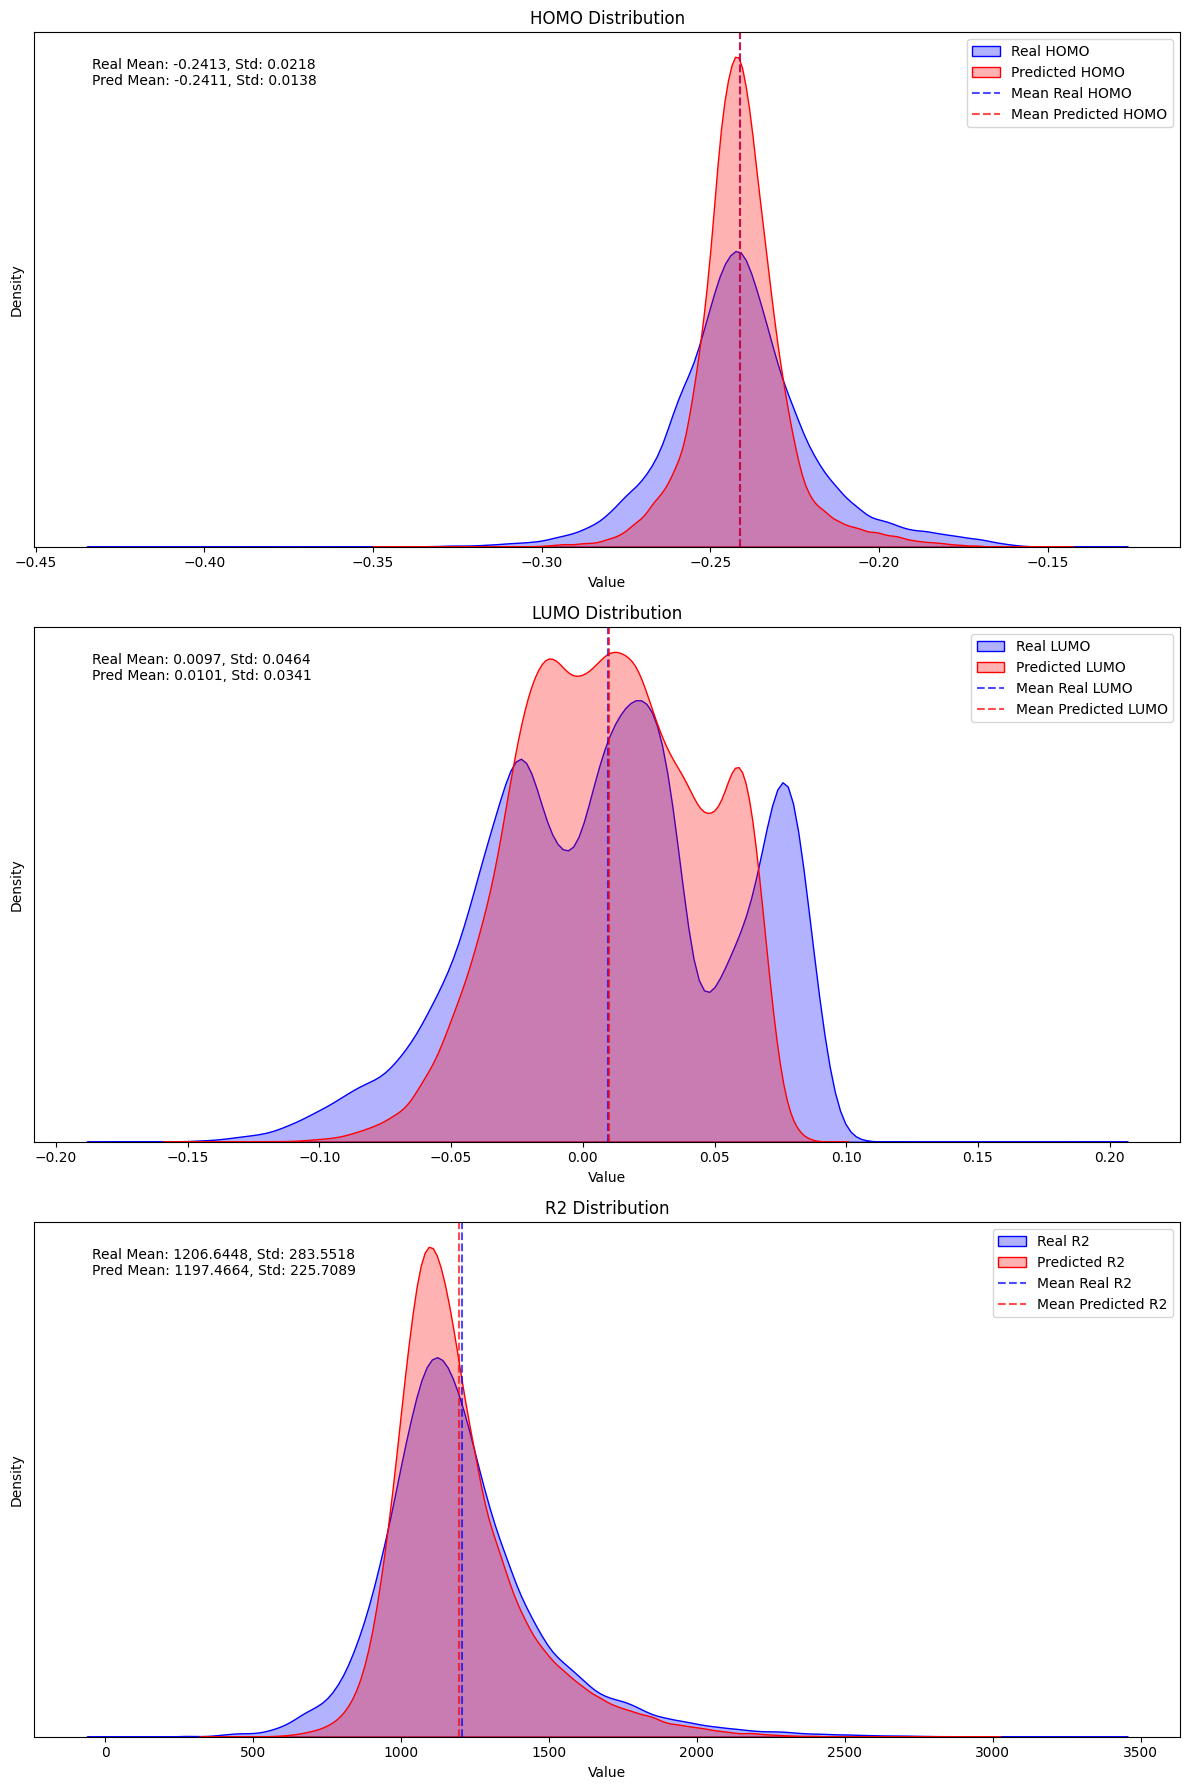

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_kde_with_mean(entire_data, save_path=None):

    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    properties = ['homo', 'lumo', 'r2']
    colors = {'real': 'blue', 'pred': 'red'}

    for i, prop in enumerate(properties):
        real_data = entire_data[prop]
        pred_data = entire_data[f'pred_{prop}_mean']
        
        # Plot KDE for real and predicted data
        for data, label, color in zip([real_data, pred_data], 
                                        [f'Real {prop.upper()}', f'Predicted {prop.upper()}'],
                                        [colors['real'], colors['pred']]):
            sns.kdeplot(data, ax=axes[i], label=label, color=color, shade=True, alpha=0.3)
        
        # Add vertical lines for mean values
        axes[i].axvline(real_data.mean(), color=colors['real'], linestyle='--', alpha=0.7, label=f'Mean Real {prop.upper()}')
        axes[i].axvline(pred_data.mean(), color=colors['pred'], linestyle='--', alpha=0.7, label=f'Mean Predicted {prop.upper()}')
        
        axes[i].set_title(f'{prop.upper()} Distribution')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].legend()
        
        # Remove y-axis labels as density values are not particularly meaningful
        axes[i].set_yticks([])
        
        # Add text annotations for mean and std
        text = f"Real Mean: {real_data.mean():.4f}, Std: {real_data.std():.4f}\n"
        text += f"Pred Mean: {pred_data.mean():.4f}, Std: {pred_data.std():.4f}"
        axes[i].text(0.05, 0.95, text, transform=axes[i].transAxes, verticalalignment='top', fontsize=10)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

entire_data = pd.read_csv('property_prediction_on_entire_data_sep_train.csv')
plot_kde_with_mean(entire_data, save_path='property_distributions_with_mean_sep_train.png')

### Using sampling for predictions

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

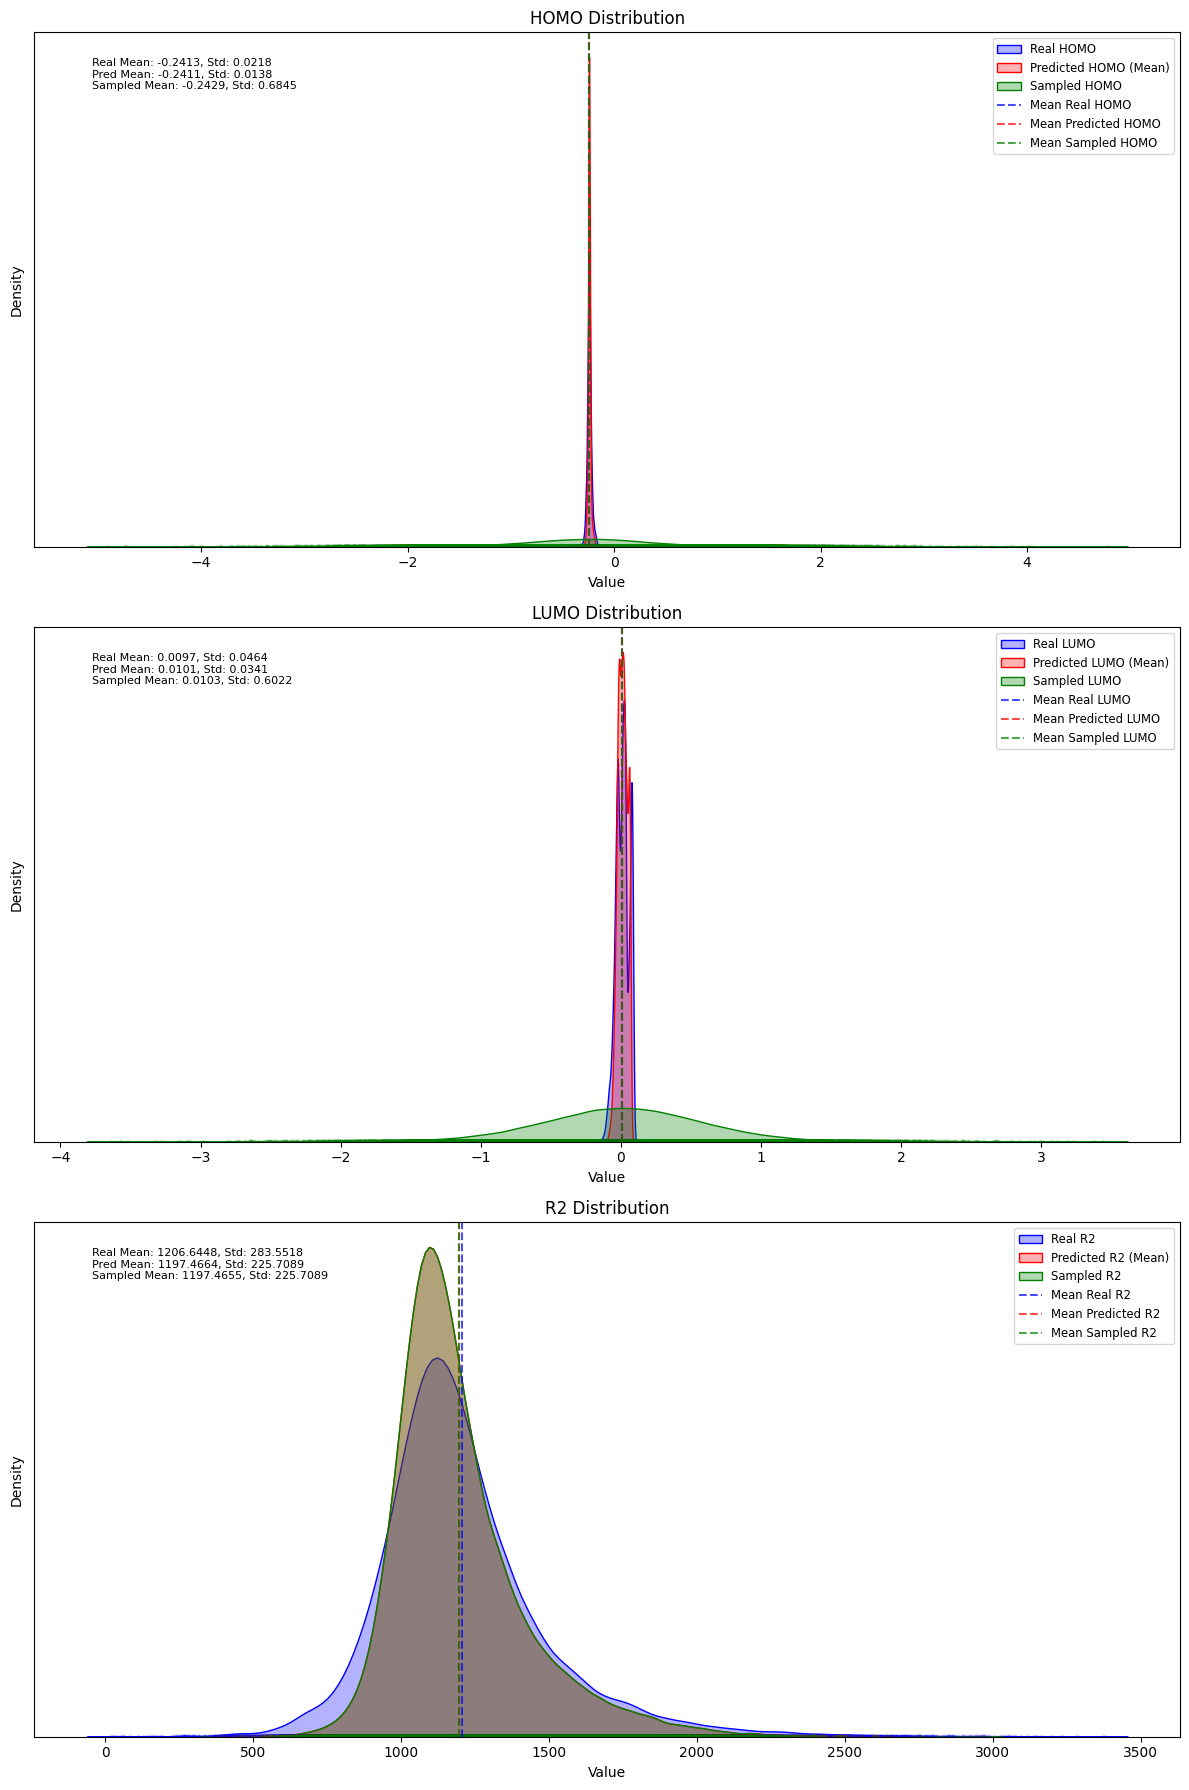

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

def sample_from_gaussian(mean, log_std):
    std = np.exp(log_std)
    return np.random.normal(mean, std)

def plot_kde_with_sampling(entire_data, save_path=None):
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    properties = ['homo', 'lumo', 'r2']
    colors = {'real': 'blue', 'pred': 'red', 'sampled': 'green'}

    for i, prop in enumerate(properties):
        real_data = entire_data[prop]
        pred_mean = entire_data[f'pred_{prop}_mean']
        pred_log_std = entire_data[f'pred_{prop}_std']  # Assuming this is log_std
        
        # Sample from Gaussian for each prediction
        sampled_data = sample_from_gaussian(pred_mean, pred_log_std)
        
        # Plot KDE for real, predicted mean, and sampled data
        for data, label, color in zip([real_data, pred_mean, sampled_data], 
                                      [f'Real {prop.upper()}', f'Predicted {prop.upper()} (Mean)', f'Sampled {prop.upper()}'],
                                      [colors['real'], colors['pred'], colors['sampled']]):
            sns.kdeplot(data, ax=axes[i], label=label, color=color, shade=True, alpha=0.3)
        
        
        # Plot scatter points for actual data points (optional, can be removed if too cluttered)
        axes[i].scatter(real_data, np.zeros_like(real_data), color=colors['real'], alpha=0.1, s=10)
        axes[i].scatter(pred_mean, np.zeros_like(pred_mean), color=colors['pred'], alpha=0.1, s=10)
        axes[i].scatter(sampled_data, np.zeros_like(sampled_data), color=colors['sampled'], alpha=0.1, s=10)
        
        # Add vertical lines for mean values
        axes[i].axvline(real_data.mean(), color=colors['real'], linestyle='--', alpha=0.7, label=f'Mean Real {prop.upper()}')
        axes[i].axvline(pred_mean.mean(), color=colors['pred'], linestyle='--', alpha=0.7, label=f'Mean Predicted {prop.upper()}')
        axes[i].axvline(sampled_data.mean(), color=colors['sampled'], linestyle='--', alpha=0.7, label=f'Mean Sampled {prop.upper()}')
        
        axes[i].set_title(f'{prop.upper()} Distribution')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].legend(fontsize='small')
        
        # Remove y-axis labels as density values are not particularly meaningful
        axes[i].set_yticks([])
        
        # Add text annotations for mean and std
        text = f"Real Mean: {real_data.mean():.4f}, Std: {real_data.std():.4f}\n"
        text += f"Pred Mean: {pred_mean.mean():.4f}, Std: {pred_mean.std():.4f}\n"
        text += f"Sampled Mean: {sampled_data.mean():.4f}, Std: {sampled_data.std():.4f}"
        axes[i].text(0.05, 0.95, text, transform=axes[i].transAxes, verticalalignment='top', fontsize=8)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

entire_data = pd.read_csv('property_prediction_on_entire_data_sep_train.csv')
plot_kde_with_sampling(entire_data, save_path='property_distributions_with_sampling_sep_train.png')

## Property Prediction on Test Data

In [37]:
'''test_data = pd.read_csv('./data/qm9_smiles_test.csv')

smiles_list_test = test_data['smiles'].tolist()
latent_points_test = []
batch_size = 32
for i in range(0, len(smiles_list_test), batch_size):
    batch = smiles_list_test[i:i+batch_size]
    mol_vec = vae_model.encode_from_smiles(batch)
    latent_points_test.append(mol_vec.data.cpu().numpy())
latent_points_test = np.vstack(latent_points_test)

# Prepare dataset and dataloader
dataset = TensorDataset(torch.tensor(latent_points_test).float())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Make predictions
predictions_test = []
with torch.no_grad():
    for batch in dataloader:
        x = batch[0].cuda()
        preds = predictor(x)
        predictions_test.append(preds.cpu().numpy())
predictions_test = np.vstack(predictions_test)

# Add predictions to DataFrame
#CHANGE THIS WITH MEAN AND STD
test_data['pred_homo_mean'] = predictions_test[:, 0]
test_data['pred_lumo_mean'] = predictions_test[:, 1]
test_data['pred_r2_mean'] = predictions_test[:, 2]

test_data['pred_homo_std'] = predictions_test[:, 3]
test_data['pred_lumo_std'] = predictions_test[:, 4]
test_data['pred_r2_std'] = predictions_test[:, 5]

# Display the DataFrame with predictions
test_data

# Denormalize the predicted values
test_data['pred_homo_mean'] = (test_data['pred_homo_mean'] * y_std[0]) + y_mean[0]
test_data['pred_lumo_mean'] = (test_data['pred_lumo_mean'] * y_std[1]) + y_mean[1]
test_data['pred_r2_mean'] = (test_data['pred_r2_mean'] * y_std[2]) + y_mean[2]

# Calculate real average values
average_homo = test_data['homo'].mean()
average_lumo = test_data['lumo'].mean()
average_r2 = test_data['r2'].mean()

# Calculate real standard deviations
std_homo = test_data['homo'].std()
std_lumo = test_data['lumo'].std()
std_r2 = test_data['r2'].std()

# Calculate predicted average values
average_homo_predicted = test_data['pred_homo_mean'].mean()
average_lumo_predicted = test_data['pred_lumo_mean'].mean()
average_r2_predicted = test_data['pred_r2_mean'].mean()

# Calculate predicted standard deviations
std_homo_predicted = test_data['pred_homo_mean'].std()
std_lumo_predicted = test_data['pred_lumo_mean'].std()
std_r2_predicted = test_data['pred_r2_mean'].std()

# Print real average values and standard deviations
print('Real:')
print(f'Average HOMO: {average_homo}')
print(f'Standard Deviation HOMO: {std_homo}')
print(f'Average LUMO: {average_lumo}')
print(f'Standard Deviation LUMO: {std_lumo}')
print(f'Average R2: {average_r2}')
print(f'Standard Deviation R2: {std_r2}')

# Print predicted average values and standard deviations
print('Predicted:')
print(f'Average HOMO: {average_homo_predicted}')
print(f'Standard Deviation HOMO: {std_homo_predicted}')
print(f'Average LUMO: {average_lumo_predicted}')
print(f'Standard Deviation LUMO: {std_lumo_predicted}')
print(f'Average R2: {average_r2_predicted}')
print(f'Standard Deviation R2: {std_r2_predicted}')'''

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Real:
Average HOMO: -0.24141776381909494
Standard Deviation HOMO: 0.02166356953914211
Average LUMO: 0.009393115577889482
Standard Deviation LUMO: 0.046440587996037064
Average R2: 1205.4655818844224
Standard Deviation R2: 280.5529620998841
Predicted:
Average HOMO: -0.24117106199264526
Standard Deviation HOMO: 0.013795995153486729
Average LUMO: 0.009786471724510193
Standard Deviation LUMO: 0.034154899418354034
Average R2: 1195.941162109375
Standard Deviation R2: 223.20816040039062


In [38]:
csv_filename = 'property_prediction_on_test_data_sep_train.csv'
test_data.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to property_prediction_on_test_data_sep_train.csv


### Using mean value for predictions

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

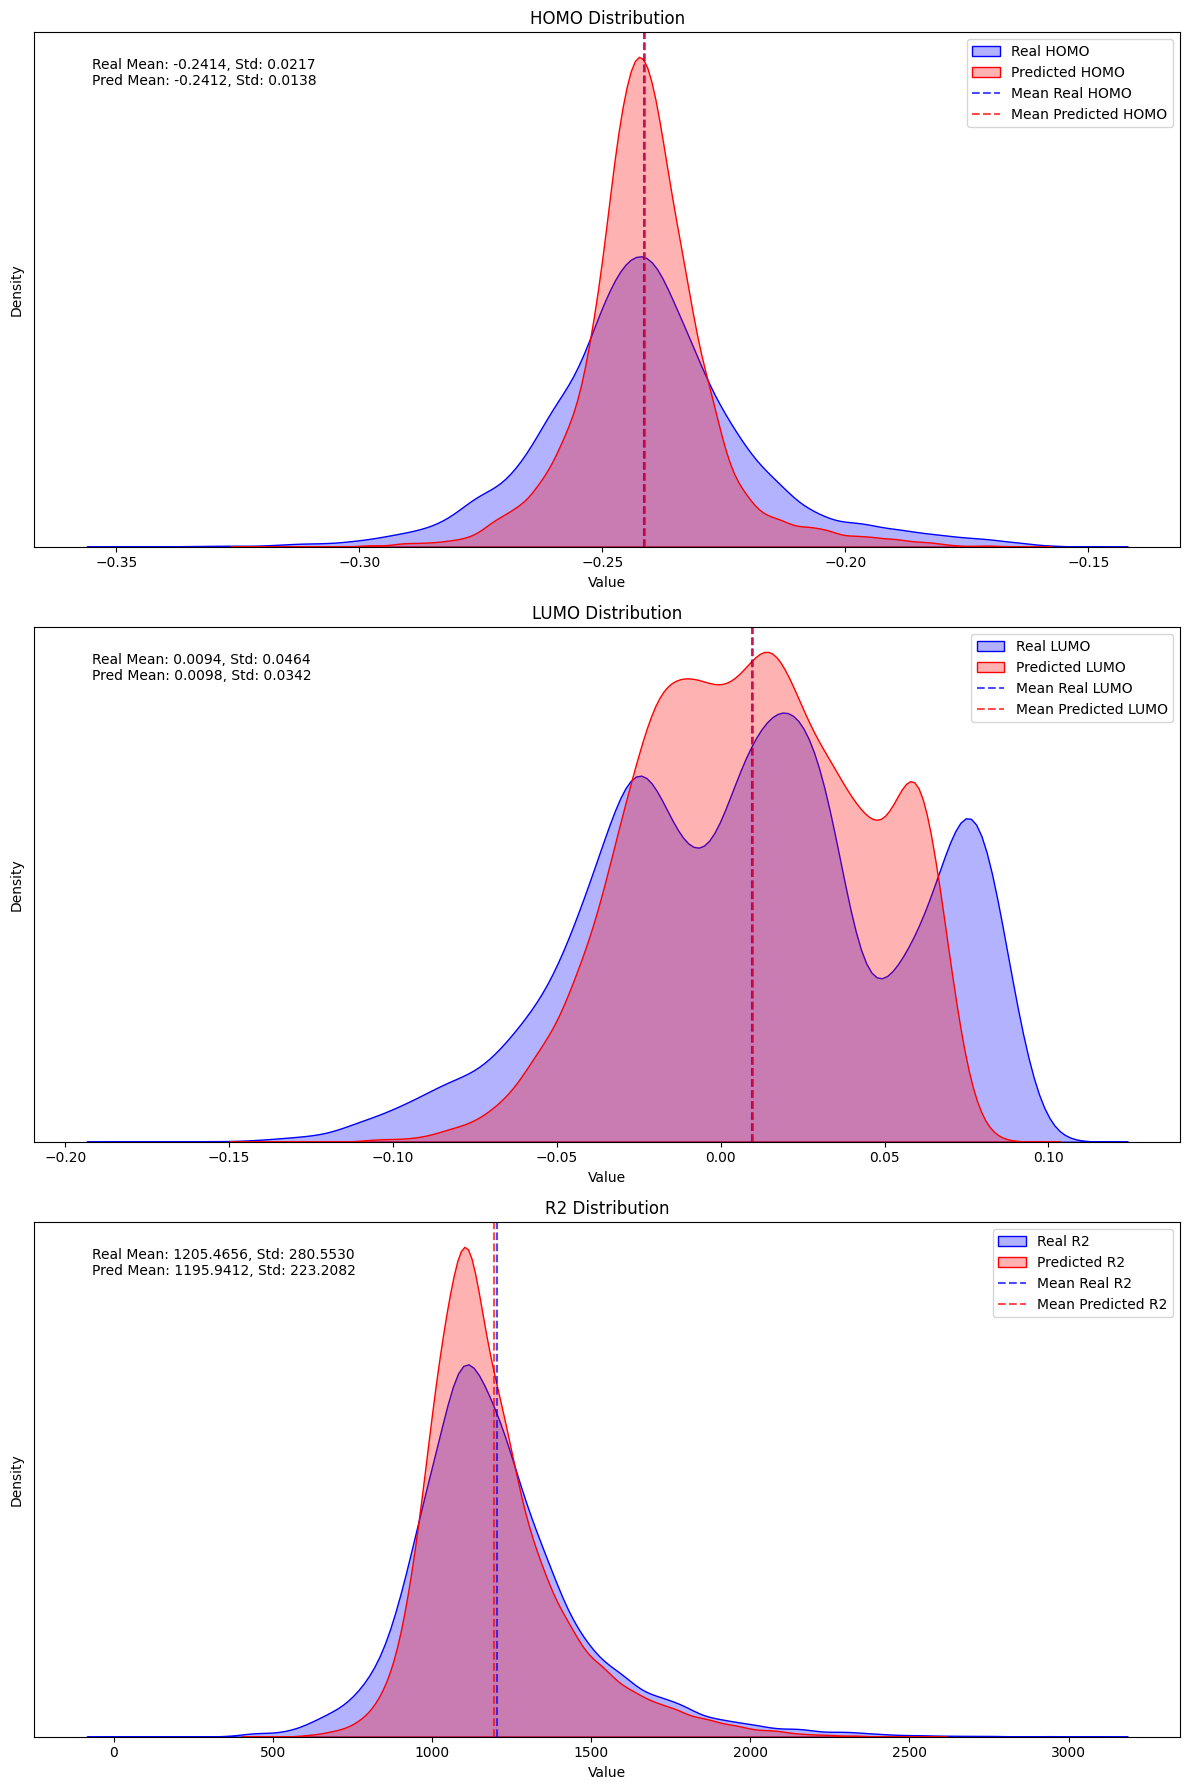

In [44]:
plot_kde_with_mean(test_data, save_path='property_distributions_test_data_with_mean_sep_train.png')

### Using sampling for predictions

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

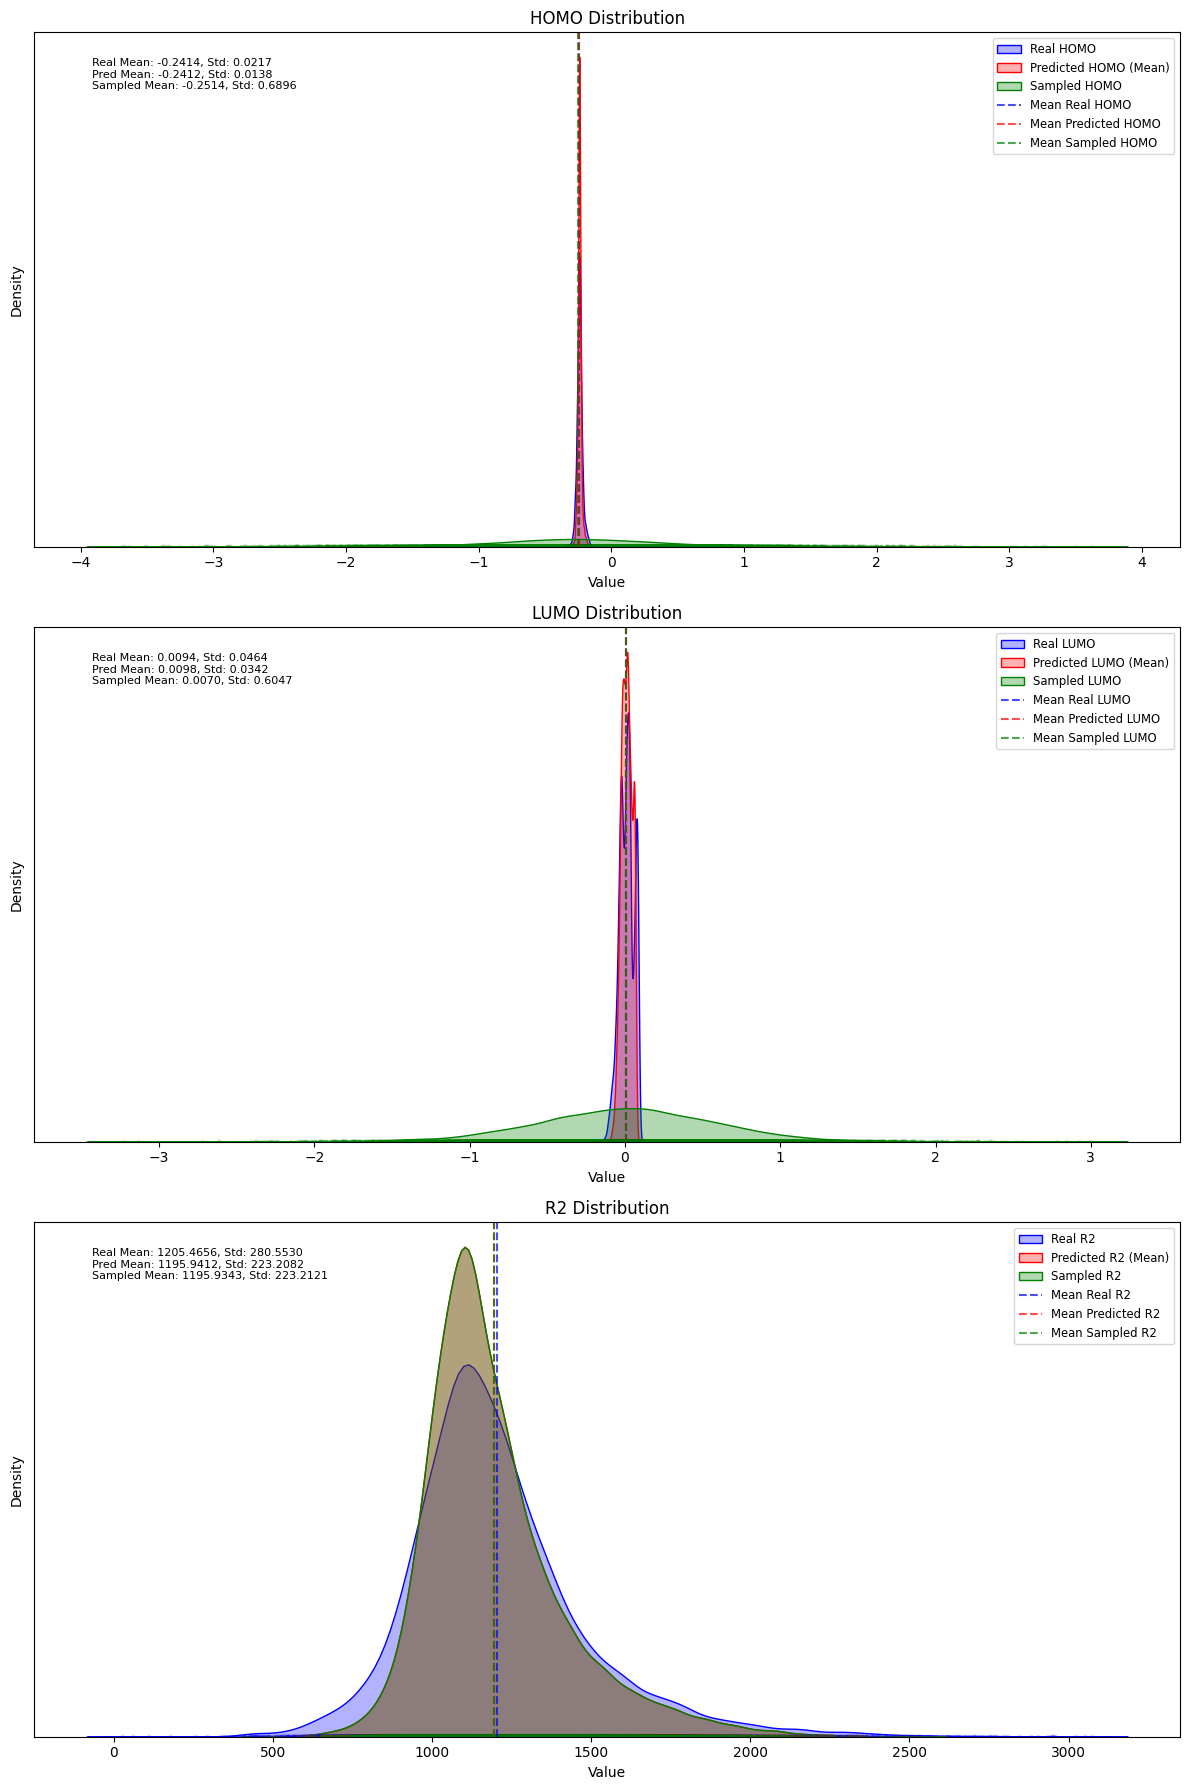

In [45]:
plot_kde_with_sampling(test_data, save_path='property_distributions_test_data_with_sampling_sep_train.png')

## Property Prediction on Sampled Data

In [46]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset

# Paths to the files
output_file = '/home/ece/Inverse-Design-For-Molecules/fast_molvae/qm9_train_data/sample.txt'
latent_file = '/home/ece/Inverse-Design-For-Molecules/fast_molvae/qm9_train_data/latent.npy'
vocab_path = './data/vocab.txt'
model_path_jtvae = 'fast_molvae/qm9_train_data/model.epoch-19'

# Load sampled SMILES strings
with open(output_file, 'r') as f:
    sampled_smiles_list = [line.strip() for line in f]

# Load latent points if they exist
try:
    sampled_latent_points = np.load(latent_file)
except FileNotFoundError:
    sampled_latent_points = None

# Load vocab and model
vocab = Vocab([x.strip("\r\n ") for x in open(vocab_path)])
vae_model = JTNNVAE(vocab, 450, 56, 20, 3)
vae_model.load_state_dict(torch.load(model_path_jtvae))
vae_model = vae_model.cuda()

# Check if the number of SMILES strings matches the number of latent points
if sampled_latent_points is None or len(sampled_smiles_list) != len(sampled_latent_points):
    print("Number of SMILES strings and latent points do not match or latent points file not found. Generating latent points again.")
    
    # Define batch size
    batch_size = 32
    
    # Function to encode SMILES to latent space
    def encode_smiles(smiles_list, model, batch_size):
        latent_points = []
        valid_smiles = []
        for i in range(0, len(smiles_list), batch_size):
            print(f"Encoding batch {i//batch_size + 1}/{(len(smiles_list) + batch_size - 1) // batch_size}")
            batch = smiles_list[i:i + batch_size]
            # Filter out invalid SMILES
            valid_batch = []
            for smiles in batch:
                try:
                    MolTree(smiles)  # Try creating a MolTree to check validity
                    valid_batch.append(smiles)
                except KeyError:
                    print(f"Invalid SMILES detected and skipped: {smiles}")
            if valid_batch:
                try:
                    mol_vec = model.encode_from_smiles(valid_batch)
                    latent_points.append(mol_vec.data.cpu().numpy())
                    valid_smiles.extend(valid_batch)
                except KeyError as e:
                    print(f"Error encoding batch, skipping: {e}")
        return np.vstack(latent_points) if latent_points else np.array([]), valid_smiles
    
    # Encode SMILES to latent points
    sampled_latent_points, valid_smiles_list = encode_smiles(sampled_smiles_list, vae_model, batch_size)
    
    if len(valid_smiles_list) > 0:
        # Save the generated latent points and valid smiles for future use
        np.save(latent_file, sampled_latent_points)
        with open(output_file.replace('.txt', '_valid.txt'), 'w') as f:
            for smiles in valid_smiles_list:
                f.write(smiles + '\n')
else:
    valid_smiles_list = sampled_smiles_list

if len(sampled_latent_points) == 0:
    raise ValueError("No valid SMILES strings found for encoding.")

# Prepare dataset and dataloader
dataset = TensorDataset(torch.tensor(sampled_latent_points).float())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Make predictions
predictions_sampled = []
with torch.no_grad():
    for batch in dataloader:
        x = batch[0].cuda()
        preds = predictor(x)
        predictions_sampled.append(preds.cpu().numpy())
predictions_sampled = np.vstack(predictions_sampled)

# Create a DataFrame for sampled data
sampled_data = pd.DataFrame({
    'smiles': valid_smiles_list,
    'pred_homo_mean': predictions_sampled[:, 0],
    'pred_lumo_mean': predictions_sampled[:, 1],
    'pred_r2_mean': predictions_sampled[:, 2],
    'pred_homo_std': predictions_sampled[:, 3],
    'pred_lumo_std': predictions_sampled[:, 4],
    'pred_r2_std': predictions_sampled[:, 5]
})

# Display the DataFrame with predictions
sampled_data

# Denormalize the predictions
sampled_data['pred_homo_mean'] = sampled_data['pred_homo_mean'] * y_std[0] + y_mean[0]
sampled_data['pred_lumo_mean'] = sampled_data['pred_lumo_mean'] * y_std[1] + y_mean[1]
sampled_data['pred_r2_mean'] = sampled_data['pred_r2_mean'] * y_std[2] + y_mean[2]

sampled_data['pred_homo_std'] = sampled_data['pred_homo_std'] * y_std[0]
sampled_data['pred_lumo_std'] = sampled_data['pred_lumo_std'] * y_std[1]
sampled_data['pred_r2_std'] = sampled_data['pred_r2_std'] * y_std[2]

# Calculate mean and standard deviation for predicted values
average_homo_predicted = sampled_data['pred_homo_mean'].mean()
average_lumo_predicted = sampled_data['pred_lumo_mean'].mean()
average_r2_predicted = sampled_data['pred_r2_mean'].mean()

std_homo_predicted = sampled_data['pred_homo_mean'].std()
std_lumo_predicted = sampled_data['pred_lumo_mean'].std()
std_r2_predicted = sampled_data['pred_r2_mean'].std()

print('Predicted:')
print(f'Average HOMO: {average_homo_predicted}')
print(f'Standard Deviation HOMO: {std_homo_predicted}')
print(f'Average LUMO: {average_lumo_predicted}')
print(f'Standard Deviation LUMO: {std_lumo_predicted}')
print(f'Average R2: {average_r2_predicted}')
print(f'Standard Deviation R2: {std_r2_predicted}')


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Number of SMILES strings and latent points do not match or latent points file not found. Generating latent points again.
Encoding batch 1/32
Encoding batch 2/32


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Encoding batch 3/32
Encoding batch 4/32
Encoding batch 5/32
Error encoding batch, skipping: 'C1=CO1'
Encoding batch 6/32
Encoding batch 7/32
Encoding batch 8/32
Encoding batch 9/32
Encoding batch 10/32
Encoding batch 11/32
Encoding batch 12/32
Encoding batch 13/32
Encoding batch 14/32
Encoding batch 15/32
Encoding batch 16/32
Encoding batch 17/32
Encoding batch 18/32
Encoding batch 19/32
Encoding batch 20/32
Encoding batch 21/32
Encoding batch 22/32
Encoding batch 23/32
Encoding batch 24/32
Encoding batch 25/32
Encoding batch 26/32
Encoding batch 27/32
Encoding batch 28/32
Encoding batch 29/32
Encoding batch 30/32
Encoding batch 31/32
Error encoding batch, skipping: 'C1=CN1'
Encoding batch 32/32
Predicted:
Average HOMO: -0.2422211766242981
Standard Deviation HOMO: 0.012438974343240261
Average LUMO: 0.010018864646553993
Standard Deviation LUMO: 0.030070165172219276
Average R2: 1197.535400390625
Standard Deviation R2: 172.7226104736328


In [47]:
csv_filename = 'property_prediction_on_sampled_data_sep_train.csv'
sampled_data.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to property_prediction_on_sampled_data_sep_train.csv


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 

`sha

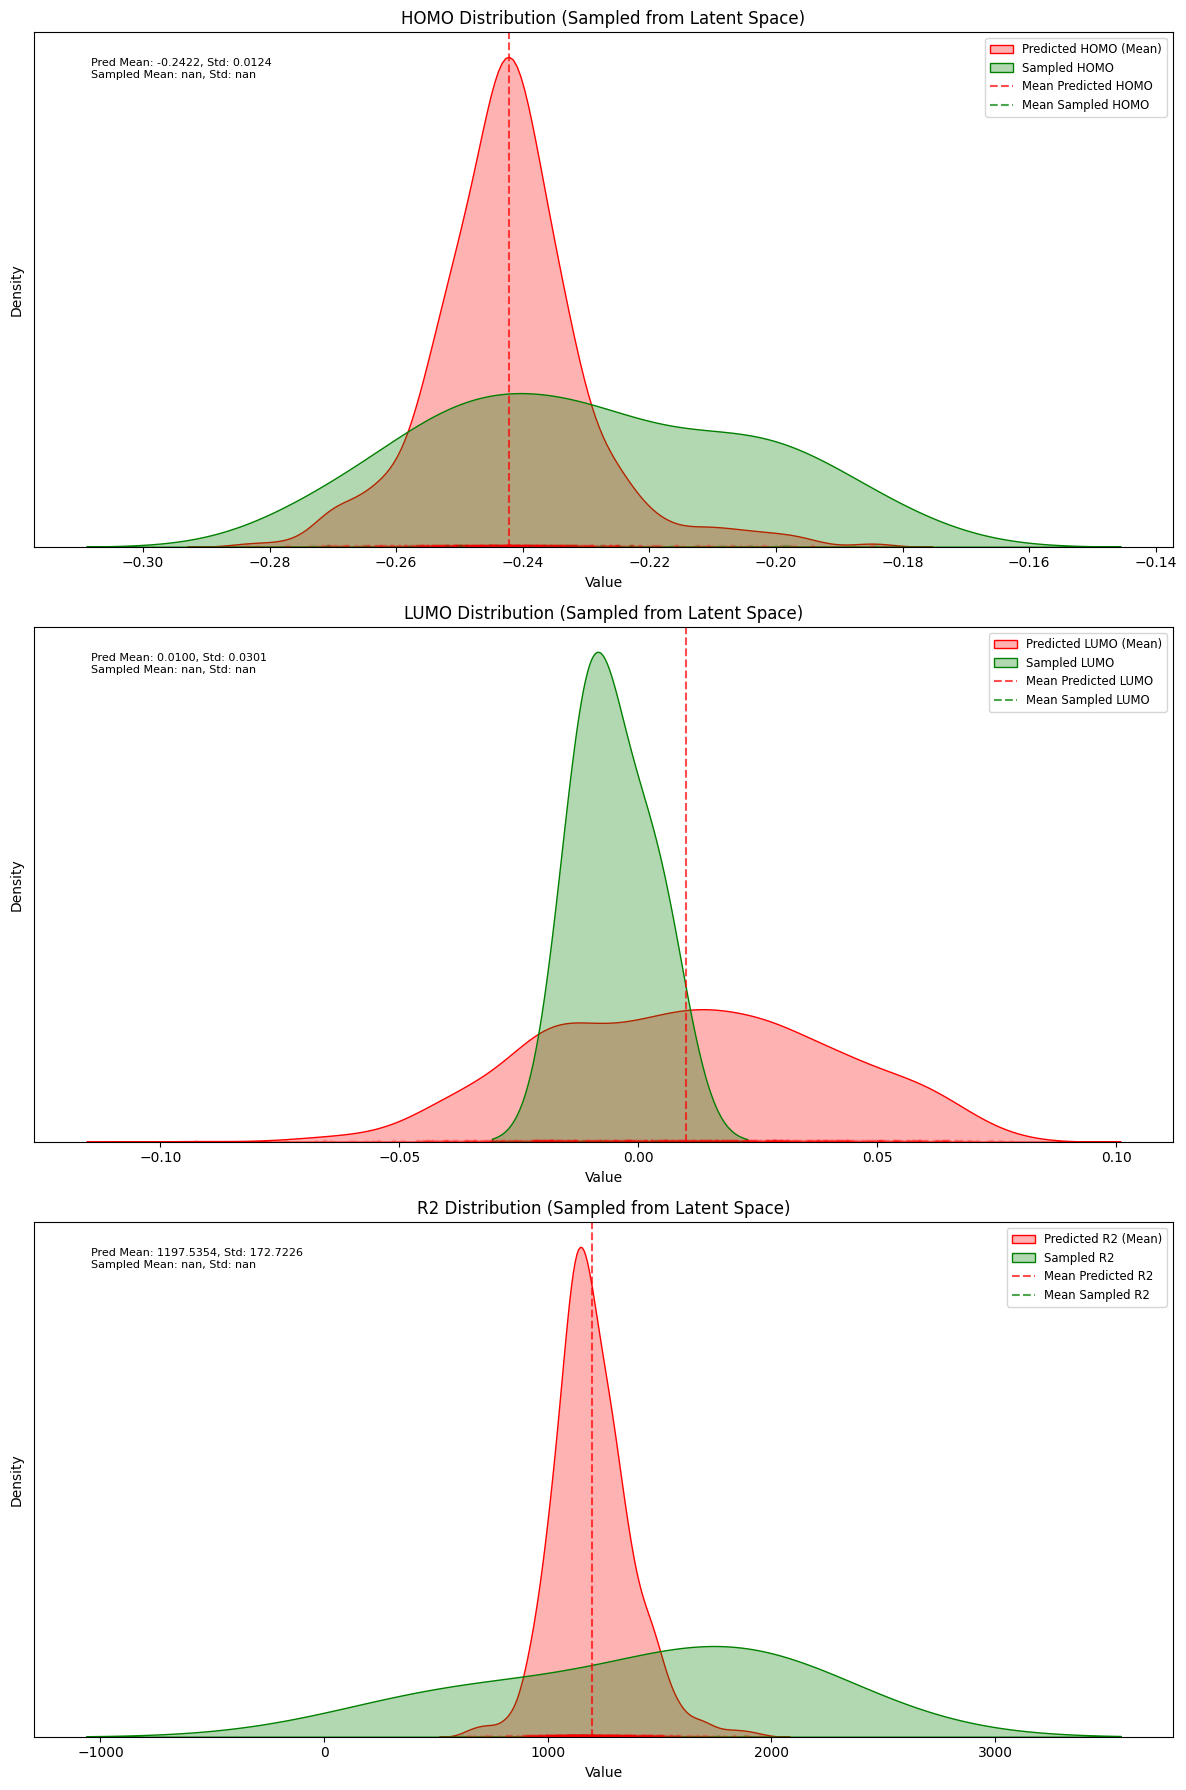

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def sample_from_gaussian(mean, log_std):
    std = np.exp(log_std)
    return np.random.normal(mean, std)

def plot_sampled_distributions(sampled_data, save_path=None):
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    properties = ['homo', 'lumo', 'r2']
    colors = {'pred': 'red', 'sampled': 'green'}

    for i, prop in enumerate(properties):
        pred_mean = sampled_data[f'pred_{prop}_mean']
        pred_log_std = np.log(sampled_data[f'pred_{prop}_std'])  # Convert std to log_std
        
        # Sample from Gaussian for each prediction
        sampled_values = sample_from_gaussian(pred_mean, pred_log_std)
        
        # Plot KDE for predicted mean and sampled data
        sns.kdeplot(pred_mean, ax=axes[i], label=f'Predicted {prop.upper()} (Mean)', color=colors['pred'], shade=True, alpha=0.3)
        sns.kdeplot(sampled_values, ax=axes[i], label=f'Sampled {prop.upper()}', color=colors['sampled'], shade=True, alpha=0.3)
        
        # Plot scatter points for predicted mean and sampled values
        axes[i].scatter(pred_mean, np.zeros_like(pred_mean), color=colors['pred'], alpha=0.1, s=10)
        axes[i].scatter(sampled_values, np.zeros_like(sampled_values), color=colors['sampled'], alpha=0.1, s=10)
        
        # Add vertical lines for mean values
        axes[i].axvline(pred_mean.mean(), color=colors['pred'], linestyle='--', alpha=0.7, label=f'Mean Predicted {prop.upper()}')
        axes[i].axvline(sampled_values.mean(), color=colors['sampled'], linestyle='--', alpha=0.7, label=f'Mean Sampled {prop.upper()}')
        
        axes[i].set_title(f'{prop.upper()} Distribution (Sampled from Latent Space)')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].legend(fontsize='small')
        
        # Remove y-axis labels as density values are not particularly meaningful
        axes[i].set_yticks([])
        
        # Add text annotations for mean and std
        text = f"Pred Mean: {pred_mean.mean():.4f}, Std: {pred_mean.std():.4f}\n"
        text += f"Sampled Mean: {sampled_values.mean():.4f}, Std: {sampled_values.std():.4f}"
        axes[i].text(0.05, 0.95, text, transform=axes[i].transAxes, verticalalignment='top', fontsize=8)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

# Use the function
plot_sampled_distributions(sampled_data, save_path='sampled_property_distributions.png')

In [50]:
# Extract matching SMILES
matching_smiles = sampled_data[sampled_data['smiles'].isin(entire_data['smiles'])]
matching_smiles

smiles  pred_homo_mean  pred_lumo_mean  pred_r2_mean  \
7         CCOC1(C#N)CC1       -0.263330        0.019372   1112.677612   
17       CC(=O)c1ccccc1       -0.240508        0.013207   1139.848389   
41        C#Cc1oncc1C#N       -0.281940       -0.040442   1024.907104   
55    CC1=CC2(CC2)CC1=O       -0.231854       -0.013998   1169.759155   
56        CCc1ccc2n1CC2       -0.204539        0.051722   1266.505249   
..                  ...             ...             ...           ...   
896     CC(C)OCC1(C)CC1       -0.241389        0.057602   1516.823730   
906        N#CCOCC1CCC1       -0.260715        0.010529   1529.008057   
924  COC(=O)C12CC(C1)C2       -0.249556       -0.002339   1125.489258   
928      CC#Cc1coc(C)c1       -0.221672        0.005779   1462.322754   
930         Nc1cnoc1C=O       -0.236933       -0.051042   1003.540588   

     pred_homo_std  pred_lumo_std  pred_r2_std  
7        -0.007680      -0.037977  -130.402466  
17       -0.006902      -0.011437  -254.451035  
41       -0.002371      -0.027769  -280.196503  
55       -0.013558      -0.027351  -321.566772  
56        0.000534      -0.029270  -228.622192  
..             ...            ...          ...  
896      -0.013509      -0.033876  -148.284897  
906      -0.003743      -0.030951   -53.785568  
924      -0.011423      -0.024820  -242.456238  
928      -0.004721      -0.028806  -147.373108  
930      -0.002363      -0.018240  -246.953125  

[101 rows x 7 columns]

In [51]:
# Merge dataframes to get real values from entire_data and predicted values from sampled_data
# Merge dataframes to get real values from entire_data and predicted values from sampled_data
merged_data = matching_smiles.merge(entire_data[['smiles', 'homo', 'lumo', 'r2']], on='smiles')
merged_data

smiles  pred_homo_mean  pred_lumo_mean  pred_r2_mean  \
0         CCOC1(C#N)CC1       -0.263330        0.019372   1112.677612   
1        CC(=O)c1ccccc1       -0.240508        0.013207   1139.848389   
2         C#Cc1oncc1C#N       -0.281940       -0.040442   1024.907104   
3     CC1=CC2(CC2)CC1=O       -0.231854       -0.013998   1169.759155   
4         CCc1ccc2n1CC2       -0.204539        0.051722   1266.505249   
..                  ...             ...             ...           ...   
96      CC(C)OCC1(C)CC1       -0.241389        0.057602   1516.823730   
97         N#CCOCC1CCC1       -0.260715        0.010529   1529.008057   
98   COC(=O)C12CC(C1)C2       -0.249556       -0.002339   1125.489258   
99       CC#Cc1coc(C)c1       -0.221672        0.005779   1462.322754   
100         Nc1cnoc1C=O       -0.236933       -0.051042   1003.540588   

     pred_homo_std  pred_lumo_std  pred_r2_std    homo    lumo         r2  
0        -0.007680      -0.037977  -130.402466 -0.2727  0.0195  1080.4310  
1        -0.006902      -0.011437  -254.451035 -0.2461 -0.0531  1232.2667  
2        -0.002371      -0.027769  -280.196503 -0.2743 -0.0848  1075.7212  
3        -0.013558      -0.027351  -321.566772 -0.2329 -0.0370  1250.7043  
4         0.000534      -0.029270  -228.622192 -0.1875  0.0541  1224.5964  
..             ...            ...          ...     ...     ...        ...  
96       -0.013509      -0.033876  -148.284897 -0.2469  0.0818  1706.3015  
97       -0.003743      -0.030951   -53.785568 -0.2808  0.0109  1901.7024  
98       -0.011423      -0.024820  -242.456238 -0.2602  0.0084  1247.7595  
99       -0.004721      -0.028806  -147.373108 -0.2057  0.0041  1726.5828  
100      -0.002363      -0.018240  -246.953125 -0.2400 -0.0712   876.3501  

[101 rows x 10 columns]

In [52]:
# Calculate mean and standard deviation for real and predicted values
average_homo_real = merged_data['homo'].mean()
average_lumo_real = merged_data['lumo'].mean()
average_r2_real = merged_data['r2'].mean()

std_homo_real = merged_data['homo'].std()
std_lumo_real = merged_data['lumo'].std()
std_r2_real = merged_data['r2'].std()

average_homo_pred = merged_data['pred_homo_mean'].mean()
average_lumo_pred = merged_data['pred_lumo_mean'].mean()
average_r2_pred = merged_data['pred_r2_mean'].mean()

std_homo_pred = merged_data['pred_homo_mean'].std()
std_lumo_pred = merged_data['pred_lumo_mean'].std()
std_r2_pred = merged_data['pred_r2_mean'].std()

# Print the results
print('Real:')
print(f'Average HOMO: {average_homo_real}')
print(f'Standard Deviation HOMO: {std_homo_real}')
print(f'Average LUMO: {average_lumo_real}')
print(f'Standard Deviation LUMO: {std_lumo_real}')
print(f'Average R2: {average_r2_real}')
print(f'Standard Deviation R2: {std_r2_real}')

print('Predicted:')
print(f'Average HOMO: {average_homo_pred}')
print(f'Standard Deviation HOMO: {std_homo_pred}')
print(f'Average LUMO: {average_lumo_pred}')
print(f'Standard Deviation LUMO: {std_lumo_pred}')
print(f'Average R2: {average_r2_pred}')
print(f'Standard Deviation R2: {std_r2_pred}')

Real:
Average HOMO: -0.24489009900990086
Standard Deviation HOMO: 0.036359921630692474
Average LUMO: -0.004283168316831683
Standard Deviation LUMO: 0.05265447952322182
Average R2: 1139.342712871287
Standard Deviation R2: 315.67084874630996
Predicted:
Average HOMO: -0.23967385292053223
Standard Deviation HOMO: 0.01829802803695202
Average LUMO: 0.0010589021258056164
Standard Deviation LUMO: 0.032278724014759064
Average R2: 1181.3375244140625
Standard Deviation R2: 201.53070068359375


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

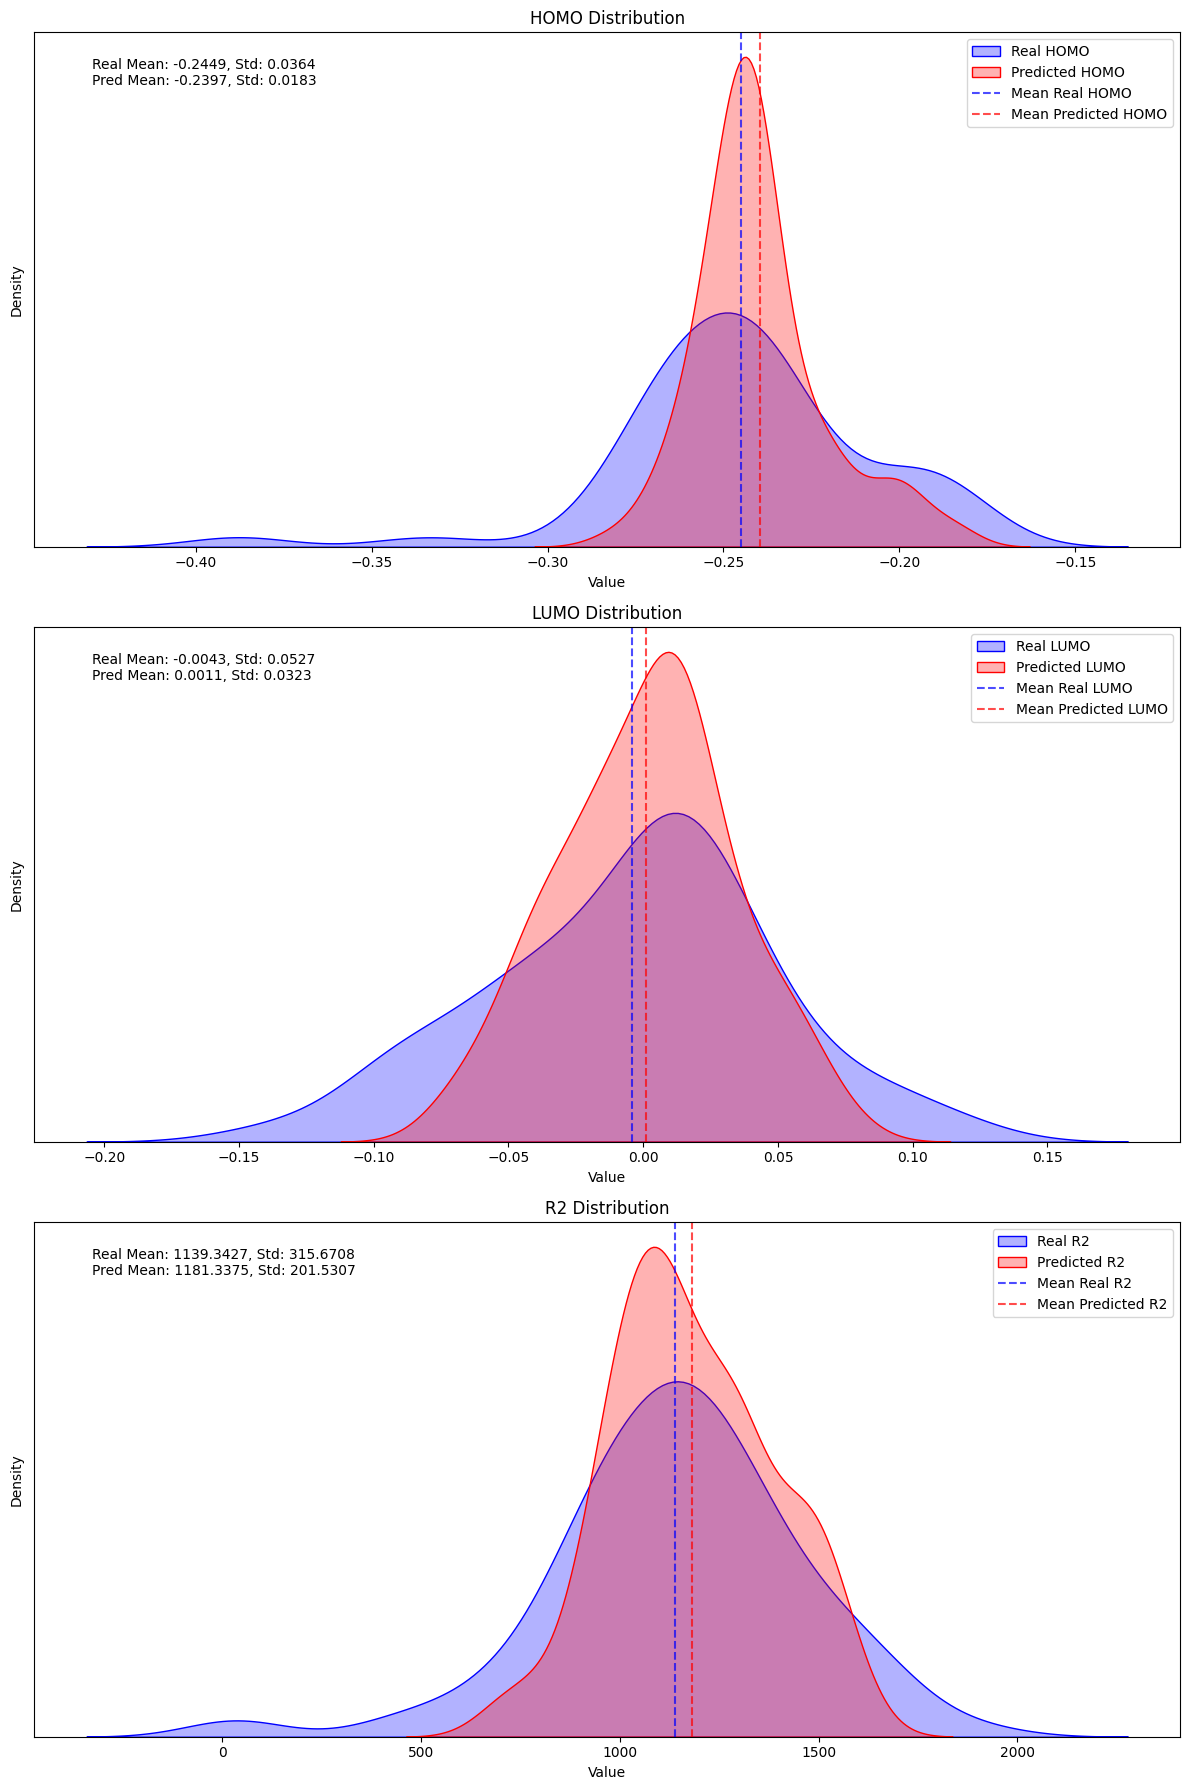

In [53]:
plot_kde_with_mean(merged_data, save_path='property_distributions_sampled_non_novel_sep_train.png')

### Using sampling for predictions

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

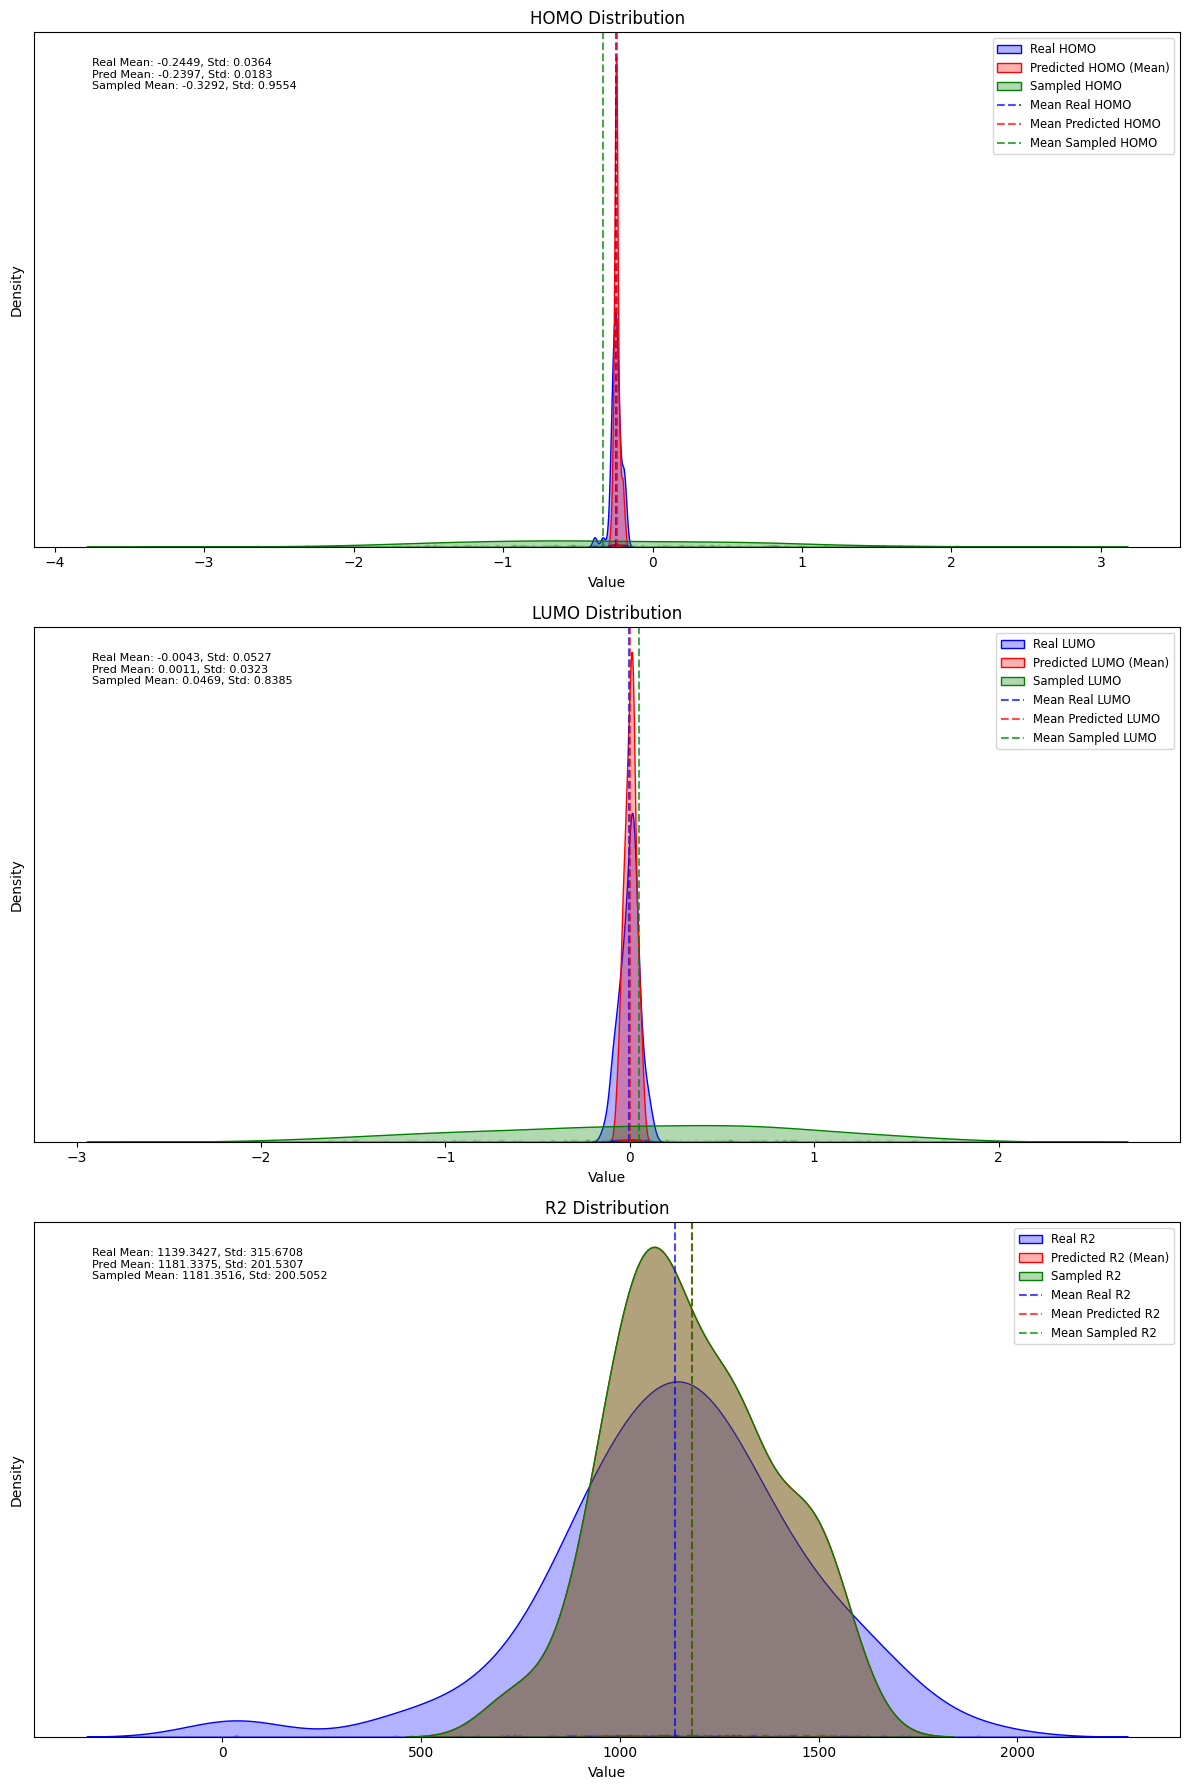

In [54]:
plot_kde_with_sampling(merged_data, save_path='property_distributions_sampled_nonnovel_data_with_sampling_sep_train.png')

# MAE Values

In [58]:
import pandas as pd
import numpy as np

def sample_from_gaussian(mean, log_std):
    mean = np.array(mean)
    std = np.exp(np.array(log_std))
    return np.random.normal(mean, std)

def calculate_mae(entire_data):
    properties = ['homo', 'lumo', 'r2']
    baseline_mae = {}
    model_mae = {}
    sampled_mae = {}

    for prop in properties:
        # Baseline MAE: average distance from mean
        mean_value = entire_data[prop].mean()
        baseline_mae[prop] = np.abs(entire_data[prop] - mean_value).mean()

        # Model MAE: average distance between predicted and real values
        model_mae[prop] = np.abs(entire_data[prop] - entire_data[f'pred_{prop}_mean']).mean()

        # Sampled MAE: average distance between sampled values and real values
        pred_mean = entire_data[f'pred_{prop}_mean']
        pred_log_std = entire_data[f'pred_{prop}_std']  # This is already log_std
        sampled_values = sample_from_gaussian(pred_mean, pred_log_std)
        sampled_mae[prop] = np.mean(np.abs(entire_data[prop] - sampled_values))

    # Create a DataFrame for the results
    mae_table = pd.DataFrame({
        'Property': properties,
        'Baseline MAE': [baseline_mae[prop] for prop in properties],
        'Model MAE': [model_mae[prop] for prop in properties],
        'Sampled MAE': [sampled_mae[prop] for prop in properties]
    })

    return mae_table

# Calculate MAE
mae_table = calculate_mae(entire_data)

# Display the table
print(mae_table.to_string(index=False))

# Optionally, save the table to a CSV file
mae_table.to_csv('mae_results_with_sampling.csv', index=False)

Property  Baseline MAE  Model MAE  Sampled MAE
    homo      0.015990   0.010371     0.523856
    lumo      0.038045   0.018874     0.467704
      r2    204.346696  92.738515    92.736377
